In [1]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
from keras.callbacks import Callback
from scipy.io import loadmat
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
import itertools
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation
from keras.optimizers import Adam,Nadam
from numpy import linalg as la
from sklearn import preprocessing
from keras import regularizers
from keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
import matplotlib.ticker as plticker

Using TensorFlow backend.


In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Confusion Matrix Function

In [3]:
def plot_cm(cm,n):
    if n != 72:
        fig = plt.figure(figsize=(6.5,6.5))
        ax = fig.add_subplot()
        plt.imshow(cm,cmap='Blues', interpolation='nearest')
        plt.colorbar()
        
        loc = plticker.MultipleLocator(base=1.0)
        ax.xaxis.set_major_locator(loc)
        ax.yaxis.set_major_locator(loc)

        if n == 6 :
            ax.set_xticklabels([''] + ["HB", "HF", "AB", "AF", "FV", "IO"])
            ax.set_yticklabels([''] + ["HB", "HF", "AB", "AF", "FV", "IO"])
        elif n == 12 :
            ax.set_xticklabels([''] + ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
            ax.set_yticklabels([''] + ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
        elif n == 2 :
            ax.set_xticklabels([''] + ["HF", "IO"])
            ax.set_yticklabels([''] + ["HF", "IO"])
    
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center",color="white" if cm[i, j] > thresh else "black");
    
    else:
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot()
        plt.imshow(cm,cmap='Blues', interpolation='nearest')
        plt.colorbar()
            
    plt.title("Confusion matrix")
    plt.ylabel('True')
    plt.xlabel('Predicted')

### Simple CNN

Τρέχουμε ένα απλό cnn για όλες τις 6 κλάσεις. Το κάθε μοντέλο το τρέχουμε ξεχωριστά για τον κάθε συμμετέχοντα και στη συνέχεια παίρνουμε τα τελικά αποτελέσματα. Δηλαδή, παίρνουμε τη μέση τιμή της ακρίβειας για κάθε συμμετέχοντα, ενώ αθροίζουμε όλους τους confusion matrices και ύστερα τους κανονικοποιούμε. Η διαδικασία αυτή εφαρμόζεται σε όλα τα μοντέλα νευρωνικών δικτύων που δοκιμάσαμε.

Train on 4150 samples, validate on 1038 samples
Epoch 1/50
4150/4150 [==============================] - 5s 1ms/step - loss: 2.1439 - accuracy: 0.2508 - val_loss: 1.9378 - val_accuracy: 0.2890
Epoch 2/50
4150/4150 [==============================] - 2s 596us/step - loss: 1.9096 - accuracy: 0.3284 - val_loss: 1.9067 - val_accuracy: 0.3632
Epoch 3/50
4150/4150 [==============================] - 3s 630us/step - loss: 1.8655 - accuracy: 0.3957 - val_loss: 1.9492 - val_accuracy: 0.3295
Epoch 4/50
4150/4150 [==============================] - 3s 635us/step - loss: 1.7930 - accuracy: 0.4537 - val_loss: 1.9561 - val_accuracy: 0.3738
Epoch 5/50
4150/4150 [==============================] - 3s 636us/step - loss: 1.6664 - accuracy: 0.4829 - val_loss: 1.8745 - val_accuracy: 0.4056
Epoch 6/50
4150/4150 [==============================] - 3s 674us/step - loss: 1.5465 - accuracy: 0.5566 - val_loss: 1.8985 - val_accuracy: 0.3988
Epoch 7/50
4150/4150 [==============================] - 3s 674us/step - loss: 

4148/4148 [==============================] - 2s 595us/step - loss: 1.6231 - accuracy: 0.5178 - val_loss: 1.9371 - val_accuracy: 0.3722
Epoch 6/50
4148/4148 [==============================] - 2s 591us/step - loss: 1.5246 - accuracy: 0.5885 - val_loss: 2.1449 - val_accuracy: 0.3664
Epoch 7/50
4148/4148 [==============================] - 2s 588us/step - loss: 1.3958 - accuracy: 0.6345 - val_loss: 2.2766 - val_accuracy: 0.3472
Epoch 8/50
4148/4148 [==============================] - 3s 612us/step - loss: 1.2956 - accuracy: 0.7042 - val_loss: 2.4513 - val_accuracy: 0.3365
Epoch 9/50
4148/4148 [==============================] - 3s 651us/step - loss: 1.1550 - accuracy: 0.7476 - val_loss: 2.3933 - val_accuracy: 0.3655
Epoch 10/50
4148/4148 [==============================] - 3s 638us/step - loss: 1.1223 - accuracy: 0.7686 - val_loss: 2.7339 - val_accuracy: 0.3635
Epoch 11/50
4148/4148 [==============================] - 3s 622us/step - loss: 1.1671 - accuracy: 0.8103 - val_loss: 2.5634 - val_accu

Epoch 10/50
4148/4148 [==============================] - 2s 592us/step - loss: 1.1918 - accuracy: 0.7775 - val_loss: 2.6446 - val_accuracy: 0.4133
Epoch 11/50
4148/4148 [==============================] - 2s 592us/step - loss: 1.1800 - accuracy: 0.8035 - val_loss: 2.5923 - val_accuracy: 0.4287
Epoch 12/50
4148/4148 [==============================] - 2s 590us/step - loss: 1.1109 - accuracy: 0.8303 - val_loss: 2.7105 - val_accuracy: 0.4075
Epoch 13/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.9935 - accuracy: 0.8443 - val_loss: 2.6042 - val_accuracy: 0.4461
Epoch 14/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.9948 - accuracy: 0.8496 - val_loss: 2.9066 - val_accuracy: 0.4345
Epoch 15/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.9878 - accuracy: 0.8602 - val_loss: 2.8819 - val_accuracy: 0.4306
Epoch 16/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.9684 - accuracy: 0.8703 - val_loss: 2

4148/4148 [==============================] - 2s 594us/step - loss: 1.1590 - accuracy: 0.7847 - val_loss: 3.0022 - val_accuracy: 0.3198
Epoch 15/50
4148/4148 [==============================] - 2s 591us/step - loss: 1.1399 - accuracy: 0.7948 - val_loss: 2.8247 - val_accuracy: 0.3372
Epoch 16/50
4148/4148 [==============================] - 2s 591us/step - loss: 1.0378 - accuracy: 0.8115 - val_loss: 2.8904 - val_accuracy: 0.3459
Epoch 17/50
4148/4148 [==============================] - 2s 590us/step - loss: 1.0675 - accuracy: 0.8243 - val_loss: 3.2424 - val_accuracy: 0.3121
Epoch 18/50
4148/4148 [==============================] - 2s 593us/step - loss: 1.1384 - accuracy: 0.8310 - val_loss: 2.9362 - val_accuracy: 0.3189
Epoch 19/50
4148/4148 [==============================] - 2s 596us/step - loss: 1.0017 - accuracy: 0.8503 - val_loss: 3.2708 - val_accuracy: 0.3266
Epoch 20/50
4148/4148 [==============================] - 2s 596us/step - loss: 0.9550 - accuracy: 0.8604 - val_loss: 3.1470 - val_

Epoch 19/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.7893 - accuracy: 0.9045 - val_loss: 2.8909 - val_accuracy: 0.4571
Epoch 20/50
4148/4148 [==============================] - 2s 592us/step - loss: 0.8303 - accuracy: 0.9014 - val_loss: 3.1529 - val_accuracy: 0.4253
Epoch 21/50
4148/4148 [==============================] - 2s 591us/step - loss: 0.7900 - accuracy: 0.9084 - val_loss: 3.6693 - val_accuracy: 0.4301
Epoch 22/50
4148/4148 [==============================] - 2s 590us/step - loss: 0.7697 - accuracy: 0.9122 - val_loss: 3.1520 - val_accuracy: 0.4484
Epoch 23/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.7625 - accuracy: 0.9204 - val_loss: 2.9982 - val_accuracy: 0.4513
Epoch 24/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.7137 - accuracy: 0.9296 - val_loss: 3.2362 - val_accuracy: 0.4426
Epoch 25/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.7338 - accuracy: 0.9209 - val_loss: 3

4148/4148 [==============================] - 2s 594us/step - loss: 0.7019 - accuracy: 0.9462 - val_loss: 3.2313 - val_accuracy: 0.4355
Epoch 24/50
4148/4148 [==============================] - 2s 593us/step - loss: 0.7435 - accuracy: 0.9474 - val_loss: 3.4873 - val_accuracy: 0.4470
Epoch 25/50
4148/4148 [==============================] - 2s 599us/step - loss: 0.6726 - accuracy: 0.9491 - val_loss: 3.4350 - val_accuracy: 0.4451
Epoch 26/50
4148/4148 [==============================] - 3s 605us/step - loss: 0.6594 - accuracy: 0.9453 - val_loss: 3.0992 - val_accuracy: 0.4489
Epoch 27/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.6322 - accuracy: 0.9477 - val_loss: 2.9642 - val_accuracy: 0.4393
Epoch 28/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.6464 - accuracy: 0.9443 - val_loss: 3.4115 - val_accuracy: 0.4210
Epoch 29/50
4148/4148 [==============================] - 2s 594us/step - loss: 0.6142 - accuracy: 0.9547 - val_loss: 3.1976 - val_

Epoch 28/50
4150/4150 [==============================] - 2s 586us/step - loss: 0.6548 - accuracy: 0.9386 - val_loss: 2.8569 - val_accuracy: 0.4297
Epoch 29/50
4150/4150 [==============================] - 2s 584us/step - loss: 0.6409 - accuracy: 0.9429 - val_loss: 3.0548 - val_accuracy: 0.4432
Epoch 30/50
4150/4150 [==============================] - 2s 587us/step - loss: 0.6682 - accuracy: 0.9311 - val_loss: 2.8856 - val_accuracy: 0.4441
Epoch 31/50
4150/4150 [==============================] - 2s 588us/step - loss: 0.6635 - accuracy: 0.9419 - val_loss: 2.9641 - val_accuracy: 0.4624
Epoch 32/50
4150/4150 [==============================] - 2s 593us/step - loss: 0.6245 - accuracy: 0.9463 - val_loss: 2.9145 - val_accuracy: 0.4345
Epoch 33/50
4150/4150 [==============================] - 2s 589us/step - loss: 0.6250 - accuracy: 0.9407 - val_loss: 3.0259 - val_accuracy: 0.4528
Epoch 34/50
4150/4150 [==============================] - 2s 587us/step - loss: 0.6013 - accuracy: 0.9429 - val_loss: 3

4147/4147 [==============================] - 2s 594us/step - loss: 0.7119 - accuracy: 0.9445 - val_loss: 4.3206 - val_accuracy: 0.2777
Epoch 33/50
4147/4147 [==============================] - 2s 593us/step - loss: 0.6893 - accuracy: 0.9474 - val_loss: 4.9900 - val_accuracy: 0.2806
Epoch 34/50
4147/4147 [==============================] - 2s 591us/step - loss: 0.6613 - accuracy: 0.9501 - val_loss: 4.7674 - val_accuracy: 0.2768
Epoch 35/50
4147/4147 [==============================] - 2s 592us/step - loss: 0.6800 - accuracy: 0.9469 - val_loss: 4.3282 - val_accuracy: 0.2864
Epoch 36/50
4147/4147 [==============================] - 2s 591us/step - loss: 0.6723 - accuracy: 0.9438 - val_loss: 4.5750 - val_accuracy: 0.2777
Epoch 37/50
4147/4147 [==============================] - 2s 592us/step - loss: 0.7099 - accuracy: 0.9416 - val_loss: 4.4904 - val_accuracy: 0.2681
Epoch 38/50
4147/4147 [==============================] - 2s 593us/step - loss: 0.6857 - accuracy: 0.9445 - val_loss: 5.1808 - val_

Epoch 37/50
4148/4148 [==============================] - 2s 591us/step - loss: 0.6727 - accuracy: 0.9455 - val_loss: 4.5109 - val_accuracy: 0.4127
Epoch 38/50
4148/4148 [==============================] - 2s 588us/step - loss: 0.6547 - accuracy: 0.9433 - val_loss: 4.1827 - val_accuracy: 0.4069
Epoch 39/50
4148/4148 [==============================] - 2s 587us/step - loss: 0.6439 - accuracy: 0.9460 - val_loss: 4.1312 - val_accuracy: 0.4224
Epoch 40/50
4148/4148 [==============================] - 2s 587us/step - loss: 0.6177 - accuracy: 0.9508 - val_loss: 4.1350 - val_accuracy: 0.4089
Epoch 41/50
4148/4148 [==============================] - 2s 588us/step - loss: 0.5958 - accuracy: 0.9523 - val_loss: 4.1863 - val_accuracy: 0.4021
Epoch 42/50
4148/4148 [==============================] - 2s 590us/step - loss: 0.6089 - accuracy: 0.9525 - val_loss: 4.2099 - val_accuracy: 0.3992
Epoch 43/50
4148/4148 [==============================] - 2s 589us/step - loss: 0.5879 - accuracy: 0.9549 - val_loss: 3

4147/4147 [==============================] - 3s 605us/step - loss: 0.7505 - accuracy: 0.9183 - val_loss: 3.1746 - val_accuracy: 0.4552
Epoch 42/50
4147/4147 [==============================] - 3s 607us/step - loss: 0.6694 - accuracy: 0.9392 - val_loss: 3.2631 - val_accuracy: 0.4494
Epoch 43/50
4147/4147 [==============================] - 3s 608us/step - loss: 0.6351 - accuracy: 0.9486 - val_loss: 3.2850 - val_accuracy: 0.4542
Epoch 44/50
4147/4147 [==============================] - 2s 592us/step - loss: 0.6216 - accuracy: 0.9501 - val_loss: 3.5259 - val_accuracy: 0.4484
Epoch 45/50
4147/4147 [==============================] - 2s 593us/step - loss: 0.6174 - accuracy: 0.9445 - val_loss: 3.2900 - val_accuracy: 0.4725
Epoch 46/50
4147/4147 [==============================] - 2s 594us/step - loss: 0.6007 - accuracy: 0.9496 - val_loss: 3.4751 - val_accuracy: 0.4301
Epoch 47/50
4147/4147 [==============================] - 2s 592us/step - loss: 0.6406 - accuracy: 0.9388 - val_loss: 3.5320 - val_

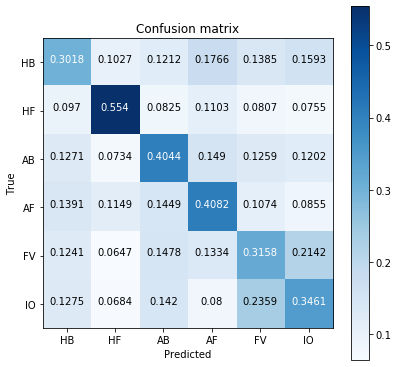

In [4]:
cm_cv1 = np.zeros((6,6))         # simple cnn
cm_cv2 = np.zeros((6,6))         # pca and simple cnn
cm_cv3 = np.zeros((6,6))         # pca, deep cnn
cm_cv4 = np.zeros((2,2))         # binary, pca, dfnn
cm_cv5 = np.zeros((2,2))         # binary, simple cnn
cm_cv6 = np.zeros((12,12))       # hf, exemplar, simple cnn
cm_cv7 = np.zeros((72,72))       # deep cnn
    
files = ["data/S1.mat", "data/S2.mat","data/S3.mat","data/S4.mat","data/S5.mat","data/S6.mat", 
         "data/S7.mat","data/S8.mat","data/S9.mat","data/S10.mat"]
N = 32
electrodes = 124
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X_2D = np.array(mat["X_2D"])

    X = X_2D
    y = np.array(mat["categoryLabels"]).ravel()         # get labels

    X_training = X[:int(0.8*len(X))]                    # create train and test sets
    X_validation = X[int(0.8*len(X)):]

    y_training = y[:int(0.8*len(X))]
    y_validation = y[int(0.8*len(X)):]

    num_classes = 6
    y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes)      # subtract 1 to convert to 0-index
    y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

    # reshape to treat the data like images (124x32)
    X_training = np.reshape(X_training, (-1, electrodes, N, 1))     
    X_validation = np.reshape(X_validation, (-1, electrodes, N, 1))
    
    # cnn model
    model = Sequential()                                                 

    model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:], activation = "relu"))
    model.add(Flatten())  
    model.add(Dense(128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-7),
                    activity_regularizer=regularizers.l2(1e-7),
                    activation = "relu"))
    model.add(Dropout(0.15))
    model.add(Dense(num_classes,activity_regularizer=regularizers.l2(1e-6), activation = "softmax"))

    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(X_training, y_training1hot,                                 # train the model
              epochs=50, 
              validation_data=(X_validation, y_validation1hot), 
              shuffle=True)

    y_validation_predictions = model.predict(X_validation, verbose=1)     # make predictions

    # create the comfusion matrix
    cnf_matrix1 = confusion_matrix(y_validation-1, np.argmax(y_validation_predictions, axis=1))
    cm_cv1 += cnf_matrix1                                                 # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation1hot)          # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                    # print mean accuracy

sum_by_row = np.sum(cm_cv1, 1)                                            # normalize the final confusion matrix
for i in range(0,6):
    cm_cv1[i,:] = cm_cv1[i,:] / sum_by_row[i]

plot_cm(np.round(cm_cv1, 4),6)                                            # plot the final confusion matrix

In [24]:
cm_cv1

array([[0.30178881, 0.10271206, 0.12117715, 0.17657242, 0.13848817,
        0.1592614 ],
       [0.09698026, 0.55400697, 0.08246225, 0.11033682, 0.08072009,
        0.07549361],
       [0.12709417, 0.073368  , 0.40439053, 0.14904679, 0.12593876,
        0.12016176],
       [0.1391455 , 0.11489607, 0.14491917, 0.40819861, 0.1073903 ,
        0.08545035],
       [0.12413395, 0.06466513, 0.147806  , 0.13337182, 0.31581986,
        0.21420323],
       [0.12753623, 0.0684058 , 0.14202899, 0.08      , 0.23594203,
        0.34608696]])

### PCA with Simple CNN

Εφαρμόζουμε το ίδιο cnn με πριν για  τις 6 κλάσεις, ωστόσο τώρα κάνουμε και PCA με svd πριν, χρησιμοποιώντας k=180, καθώς από τη συνάρτηση lda που έχουμε φτιάξει, το βέλτιστο k έβγαινε πολλές φορές γύρω στο 180.

Train on 4150 samples, validate on 1038 samples
Epoch 1/50
4150/4150 [==============================] - 1s 279us/step - loss: 1.8714 - accuracy: 0.2171 - val_loss: 1.8291 - val_accuracy: 0.2505
Epoch 2/50
4150/4150 [==============================] - 1s 150us/step - loss: 1.7763 - accuracy: 0.3094 - val_loss: 1.7772 - val_accuracy: 0.2996
Epoch 3/50
4150/4150 [==============================] - 1s 147us/step - loss: 1.6828 - accuracy: 0.3814 - val_loss: 1.7365 - val_accuracy: 0.3295
Epoch 4/50
4150/4150 [==============================] - 1s 145us/step - loss: 1.5817 - accuracy: 0.4492 - val_loss: 1.7442 - val_accuracy: 0.3536
Epoch 5/50
4150/4150 [==============================] - 1s 146us/step - loss: 1.4829 - accuracy: 0.5005 - val_loss: 1.7652 - val_accuracy: 0.3719
Epoch 6/50
4150/4150 [==============================] - 1s 145us/step - loss: 1.3855 - accuracy: 0.5537 - val_loss: 1.8592 - val_accuracy: 0.3555
Epoch 7/50
4150/4150 [==============================] - 1s 146us/step - loss

4148/4148 [==============================] - 1s 147us/step - loss: 1.4238 - accuracy: 0.5378 - val_loss: 1.8371 - val_accuracy: 0.3144
Epoch 6/50
4148/4148 [==============================] - 1s 157us/step - loss: 1.3040 - accuracy: 0.6189 - val_loss: 1.9961 - val_accuracy: 0.3067
Epoch 7/50
4148/4148 [==============================] - 1s 153us/step - loss: 1.1808 - accuracy: 0.6815 - val_loss: 2.0658 - val_accuracy: 0.3067
Epoch 8/50
4148/4148 [==============================] - 1s 144us/step - loss: 1.0675 - accuracy: 0.7551 - val_loss: 2.1840 - val_accuracy: 0.2980
Epoch 9/50
4148/4148 [==============================] - 1s 143us/step - loss: 0.9419 - accuracy: 0.8199 - val_loss: 2.3758 - val_accuracy: 0.2960
Epoch 10/50
4148/4148 [==============================] - 1s 143us/step - loss: 0.8546 - accuracy: 0.8498 - val_loss: 2.4071 - val_accuracy: 0.2932
Epoch 11/50
4148/4148 [==============================] - 1s 143us/step - loss: 0.7668 - accuracy: 0.8966 - val_loss: 2.5063 - val_accu

4148/4148 [==============================] - 1s 161us/step - loss: 1.1373 - accuracy: 0.6610 - val_loss: 1.8789 - val_accuracy: 0.3372
Epoch 10/50
4148/4148 [==============================] - 1s 158us/step - loss: 1.0644 - accuracy: 0.7020 - val_loss: 1.9158 - val_accuracy: 0.3459
Epoch 11/50
4148/4148 [==============================] - 1s 163us/step - loss: 1.0236 - accuracy: 0.7254 - val_loss: 1.9792 - val_accuracy: 0.3468
Epoch 12/50
4148/4148 [==============================] - 1s 158us/step - loss: 0.9725 - accuracy: 0.7476 - val_loss: 2.3159 - val_accuracy: 0.3449
Epoch 13/50
4148/4148 [==============================] - 1s 170us/step - loss: 0.9193 - accuracy: 0.7715 - val_loss: 2.2191 - val_accuracy: 0.3256
Epoch 14/50
4148/4148 [==============================] - 1s 159us/step - loss: 0.8872 - accuracy: 0.7840 - val_loss: 2.5598 - val_accuracy: 0.3160
Epoch 15/50
4148/4148 [==============================] - 1s 158us/step - loss: 0.8970 - accuracy: 0.7886 - val_loss: 2.2988 - val_

Epoch 14/50
4148/4148 [==============================] - 1s 159us/step - loss: 1.1374 - accuracy: 0.6586 - val_loss: 2.1923 - val_accuracy: 0.2852
Epoch 15/50
4148/4148 [==============================] - 1s 142us/step - loss: 1.0803 - accuracy: 0.6849 - val_loss: 2.2469 - val_accuracy: 0.2987
Epoch 16/50
4148/4148 [==============================] - 1s 152us/step - loss: 1.0562 - accuracy: 0.6991 - val_loss: 2.2182 - val_accuracy: 0.2852
Epoch 17/50
4148/4148 [==============================] - 1s 155us/step - loss: 0.9889 - accuracy: 0.7261 - val_loss: 2.2989 - val_accuracy: 0.2977
Epoch 18/50
4148/4148 [==============================] - 1s 149us/step - loss: 1.0010 - accuracy: 0.7264 - val_loss: 2.3367 - val_accuracy: 0.2900
Epoch 19/50
4148/4148 [==============================] - 1s 163us/step - loss: 0.9430 - accuracy: 0.7408 - val_loss: 2.4343 - val_accuracy: 0.3015
Epoch 20/50
4148/4148 [==============================] - 1s 153us/step - loss: 0.9033 - accuracy: 0.7568 - val_loss: 2

4148/4148 [==============================] - 1s 169us/step - loss: 0.5647 - accuracy: 0.9347 - val_loss: 2.7321 - val_accuracy: 0.3414
Epoch 19/50
4148/4148 [==============================] - 1s 168us/step - loss: 0.5622 - accuracy: 0.9371 - val_loss: 2.8325 - val_accuracy: 0.3221
Epoch 20/50
4148/4148 [==============================] - 1s 156us/step - loss: 0.5533 - accuracy: 0.9412 - val_loss: 2.8740 - val_accuracy: 0.3356
Epoch 21/50
4148/4148 [==============================] - 1s 162us/step - loss: 0.5561 - accuracy: 0.9320 - val_loss: 2.8609 - val_accuracy: 0.3124
Epoch 22/50
4148/4148 [==============================] - 1s 176us/step - loss: 0.5140 - accuracy: 0.9441 - val_loss: 2.8065 - val_accuracy: 0.3404
Epoch 23/50
4148/4148 [==============================] - 1s 180us/step - loss: 0.5027 - accuracy: 0.9458 - val_loss: 2.8962 - val_accuracy: 0.3269
Epoch 24/50
4148/4148 [==============================] - 1s 149us/step - loss: 0.5152 - accuracy: 0.9460 - val_loss: 2.9821 - val_

Epoch 23/50
4148/4148 [==============================] - 1s 132us/step - loss: 0.4498 - accuracy: 0.9670 - val_loss: 2.7228 - val_accuracy: 0.3844
Epoch 24/50
4148/4148 [==============================] - 1s 139us/step - loss: 0.4322 - accuracy: 0.9694 - val_loss: 2.6225 - val_accuracy: 0.3497
Epoch 25/50
4148/4148 [==============================] - 1s 122us/step - loss: 0.4999 - accuracy: 0.9484 - val_loss: 2.6825 - val_accuracy: 0.3439
Epoch 26/50
4148/4148 [==============================] - 1s 133us/step - loss: 0.5237 - accuracy: 0.9438 - val_loss: 2.6965 - val_accuracy: 0.3545
Epoch 27/50
4148/4148 [==============================] - 1s 165us/step - loss: 0.5192 - accuracy: 0.9385 - val_loss: 2.7572 - val_accuracy: 0.3767
Epoch 28/50
4148/4148 [==============================] - 1s 153us/step - loss: 0.5249 - accuracy: 0.9366 - val_loss: 2.6339 - val_accuracy: 0.3651
Epoch 29/50
4148/4148 [==============================] - 1s 144us/step - loss: 0.4727 - accuracy: 0.9576 - val_loss: 2

4150/4150 [==============================] - 1s 146us/step - loss: 0.4683 - accuracy: 0.9610 - val_loss: 2.4210 - val_accuracy: 0.3988
Epoch 28/50
4150/4150 [==============================] - 1s 147us/step - loss: 0.4734 - accuracy: 0.9528 - val_loss: 2.5215 - val_accuracy: 0.3911
Epoch 29/50
4150/4150 [==============================] - 1s 144us/step - loss: 0.4742 - accuracy: 0.9566 - val_loss: 2.4453 - val_accuracy: 0.3998
Epoch 30/50
4150/4150 [==============================] - 1s 145us/step - loss: 0.4445 - accuracy: 0.9622 - val_loss: 2.5149 - val_accuracy: 0.4075
Epoch 31/50
4150/4150 [==============================] - 1s 144us/step - loss: 0.4451 - accuracy: 0.9631 - val_loss: 2.6540 - val_accuracy: 0.3950
Epoch 32/50
4150/4150 [==============================] - 1s 144us/step - loss: 0.4253 - accuracy: 0.9672 - val_loss: 2.6025 - val_accuracy: 0.4075
Epoch 33/50
4150/4150 [==============================] - 1s 146us/step - loss: 0.4192 - accuracy: 0.9670 - val_loss: 2.6786 - val_

Epoch 32/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.5278 - accuracy: 0.9424 - val_loss: 3.3160 - val_accuracy: 0.2459
Epoch 33/50
4147/4147 [==============================] - 1s 142us/step - loss: 0.5145 - accuracy: 0.9448 - val_loss: 3.4168 - val_accuracy: 0.2401
Epoch 34/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.4963 - accuracy: 0.9482 - val_loss: 3.5679 - val_accuracy: 0.2334
Epoch 35/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.5021 - accuracy: 0.9419 - val_loss: 3.4408 - val_accuracy: 0.2411
Epoch 36/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.5446 - accuracy: 0.9301 - val_loss: 3.4587 - val_accuracy: 0.2314
Epoch 37/50
4147/4147 [==============================] - 1s 145us/step - loss: 0.5121 - accuracy: 0.9409 - val_loss: 3.4612 - val_accuracy: 0.2382
Epoch 38/50
4147/4147 [==============================] - 1s 147us/step - loss: 0.5051 - accuracy: 0.9436 - val_loss: 3

Epoch 37/50
4148/4148 [==============================] - 1s 142us/step - loss: 0.4754 - accuracy: 0.9453 - val_loss: 3.0623 - val_accuracy: 0.3963
Epoch 38/50
4148/4148 [==============================] - 1s 141us/step - loss: 0.4833 - accuracy: 0.9455 - val_loss: 3.2391 - val_accuracy: 0.3674
Epoch 39/50
4148/4148 [==============================] - 1s 140us/step - loss: 0.4865 - accuracy: 0.9462 - val_loss: 3.2109 - val_accuracy: 0.3751
Epoch 40/50
4148/4148 [==============================] - 1s 143us/step - loss: 0.5009 - accuracy: 0.9347 - val_loss: 3.2320 - val_accuracy: 0.3626
Epoch 41/50
4148/4148 [==============================] - 1s 141us/step - loss: 0.5135 - accuracy: 0.9298 - val_loss: 3.1147 - val_accuracy: 0.3703
Epoch 42/50
4148/4148 [==============================] - 1s 140us/step - loss: 0.4988 - accuracy: 0.9339 - val_loss: 3.1789 - val_accuracy: 0.3578
Epoch 43/50
4148/4148 [==============================] - 1s 142us/step - loss: 0.4967 - accuracy: 0.9513 - val_loss: 3

4147/4147 [==============================] - 1s 143us/step - loss: 0.4809 - accuracy: 0.9286 - val_loss: 3.1803 - val_accuracy: 0.3298
Epoch 42/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.4893 - accuracy: 0.9207 - val_loss: 3.0862 - val_accuracy: 0.3327
Epoch 43/50
4147/4147 [==============================] - 1s 144us/step - loss: 0.5023 - accuracy: 0.9122 - val_loss: 3.1594 - val_accuracy: 0.3317
Epoch 44/50
4147/4147 [==============================] - 1s 143us/step - loss: 0.4836 - accuracy: 0.9151 - val_loss: 3.1032 - val_accuracy: 0.3404
Epoch 45/50
4147/4147 [==============================] - 1s 145us/step - loss: 0.5126 - accuracy: 0.9093 - val_loss: 3.2201 - val_accuracy: 0.3337
Epoch 46/50
4147/4147 [==============================] - 1s 144us/step - loss: 0.4882 - accuracy: 0.9286 - val_loss: 3.4056 - val_accuracy: 0.3375
Epoch 47/50
4147/4147 [==============================] - 1s 144us/step - loss: 0.5029 - accuracy: 0.9211 - val_loss: 3.1483 - val_

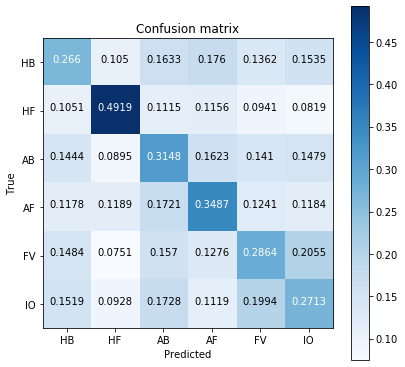

In [5]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X_2D = np.array(mat["X_2D"])
    categoryLabels = np.array(mat["categoryLabels"])     # get labels

    k = 180
    X = X_2D.copy()
    y = categoryLabels.ravel()
    X -= np.mean(X, axis=0)

    [u,s,v] = la.svd(X)                                   # pca with svd, using an optimum k
    v = v.transpose() 
    v_new = v[:,:k]
    X_pca = np.dot(X, v_new)


    X_training = X_pca[:int(0.8*len(X_pca))]              # create train and test sets
    X_validation = X_pca[int(0.8*len(X_pca)):]

    y_training = y[:int(0.8*len(X_pca))]
    y_validation = y[int(0.8*len(X_pca)):]

    X_training = np.reshape(X_training, (-1, 30, 6, 1))
    X_validation = np.reshape(X_validation, (-1, 30, 6, 1))

    num_classes = 6
    y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes)      # subtract 1 to convert to 0-index
    y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

    # cnn model
    model = Sequential()                                                        

    model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:],  activation = "relu"))
    model.add(Flatten())
    model.add(Dense(units=128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-3),
                    activity_regularizer=regularizers.l2(1e-3),
                    activation = "relu"))
    model.add(Dropout(0.15))
    model.add(Dense(units=num_classes,activity_regularizer=regularizers.l2(1e-5),  activation = "softmax"))

    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(X_training, y_training1hot,                                       # train the model
              epochs=50, 
              validation_data=(X_validation, y_validation1hot), 
              shuffle=True)
    
    y_validation_predictions = model.predict(X_validation, verbose=1)           # make predictions
    
    # create the confusion matrix
    cnf_matrix2 = confusion_matrix(y_validation-1, np.argmax(y_validation_predictions, axis=1))
    cm_cv2 += cnf_matrix2                                                      # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation1hot)               # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                         # print mean accuracy

sum_by_row = np.sum(cm_cv2, 1)                                                 # normalize the final confusion matrix
for i in range(0,6):
    cm_cv2[i,:] = cm_cv2[i,:] / sum_by_row[i]

plot_cm(np.round(cm_cv2, 4),6)                                                 # plot the final confusion matrix

In [23]:
cm_cv2

array([[0.26601269, 0.1050202 , 0.16330063, 0.17599538, 0.13618003,
        0.15349106],
       [0.10511034, 0.49186992, 0.11149826, 0.1155633 , 0.09407666,
        0.08188153],
       [0.14442519, 0.08954362, 0.31484691, 0.16233391, 0.14095898,
        0.14789139],
       [0.11778291, 0.11893764, 0.17205543, 0.34872979, 0.12413395,
        0.11836028],
       [0.14838337, 0.07505774, 0.15704388, 0.12759815, 0.28637413,
        0.20554273],
       [0.15188406, 0.09275362, 0.17275362, 0.11188406, 0.19942029,
        0.27130435]])

### PCA with Deep CNN

Φτιάχνουμε ένα Deep CNN και το τρέχουμε πάλι για τις 6 κλάσεις, ενώ κάνουμε PCA με svd πριν, χρησιμοποιώντας k=180

Train on 4150 samples, validate on 1038 samples
Epoch 1/50
4150/4150 [==============================] - 3s 720us/step - loss: 1.8824 - accuracy: 0.1728 - val_loss: 4.4969 - val_accuracy: 0.1763
Epoch 2/50
4150/4150 [==============================] - 2s 385us/step - loss: 1.7989 - accuracy: 0.1988 - val_loss: 8.6101 - val_accuracy: 0.1599
Epoch 3/50
4150/4150 [==============================] - 2s 397us/step - loss: 1.7467 - accuracy: 0.2472 - val_loss: 3.9619 - val_accuracy: 0.1859
Epoch 4/50
4150/4150 [==============================] - 2s 397us/step - loss: 1.6966 - accuracy: 0.2805 - val_loss: 1.8843 - val_accuracy: 0.2669
Epoch 5/50
4150/4150 [==============================] - 2s 393us/step - loss: 1.6259 - accuracy: 0.3157 - val_loss: 1.6718 - val_accuracy: 0.2852
Epoch 6/50
4150/4150 [==============================] - 2s 394us/step - loss: 1.5466 - accuracy: 0.3530 - val_loss: 1.7091 - val_accuracy: 0.2582
Epoch 7/50
4150/4150 [==============================] - 2s 394us/step - loss

4148/4148 [==============================] - 2s 405us/step - loss: 1.4496 - accuracy: 0.4163 - val_loss: 1.8086 - val_accuracy: 0.3086
Epoch 6/50
4148/4148 [==============================] - 2s 368us/step - loss: 1.3227 - accuracy: 0.4675 - val_loss: 1.7344 - val_accuracy: 0.3385
Epoch 7/50
4148/4148 [==============================] - 2s 370us/step - loss: 1.1880 - accuracy: 0.5304 - val_loss: 1.8278 - val_accuracy: 0.3153
Epoch 8/50
4148/4148 [==============================] - 2s 376us/step - loss: 1.0465 - accuracy: 0.5841 - val_loss: 2.0568 - val_accuracy: 0.3028
Epoch 9/50
4148/4148 [==============================] - 2s 384us/step - loss: 0.8716 - accuracy: 0.6649 - val_loss: 2.1804 - val_accuracy: 0.3182
Epoch 10/50
4148/4148 [==============================] - 2s 424us/step - loss: 0.7575 - accuracy: 0.7081 - val_loss: 2.4189 - val_accuracy: 0.3182
Epoch 11/50
4148/4148 [==============================] - 2s 403us/step - loss: 0.6809 - accuracy: 0.7322 - val_loss: 3.0393 - val_accu

Epoch 10/50
4148/4148 [==============================] - 2s 422us/step - loss: 0.3421 - accuracy: 0.8790 - val_loss: 2.6448 - val_accuracy: 0.3902
Epoch 11/50
4148/4148 [==============================] - 2s 418us/step - loss: 0.2531 - accuracy: 0.9139 - val_loss: 3.3126 - val_accuracy: 0.3728
Epoch 12/50
4148/4148 [==============================] - 2s 390us/step - loss: 0.1882 - accuracy: 0.9320 - val_loss: 3.0330 - val_accuracy: 0.4210
Epoch 13/50
4148/4148 [==============================] - 2s 413us/step - loss: 0.1876 - accuracy: 0.9376 - val_loss: 3.6636 - val_accuracy: 0.3844
Epoch 14/50
4148/4148 [==============================] - 2s 415us/step - loss: 0.1725 - accuracy: 0.9385 - val_loss: 3.4421 - val_accuracy: 0.4239
Epoch 15/50
4148/4148 [==============================] - 2s 387us/step - loss: 0.1434 - accuracy: 0.9530 - val_loss: 3.7598 - val_accuracy: 0.3863
Epoch 16/50
4148/4148 [==============================] - 2s 416us/step - loss: 0.1561 - accuracy: 0.9472 - val_loss: 3

4148/4148 [==============================] - 2s 367us/step - loss: 0.5493 - accuracy: 0.7888 - val_loss: 3.4369 - val_accuracy: 0.2803
Epoch 15/50
4148/4148 [==============================] - 2s 367us/step - loss: 0.4639 - accuracy: 0.8202 - val_loss: 3.6770 - val_accuracy: 0.3035
Epoch 16/50
4148/4148 [==============================] - 2s 366us/step - loss: 0.4408 - accuracy: 0.8337 - val_loss: 3.6138 - val_accuracy: 0.3179
Epoch 17/50
4148/4148 [==============================] - 2s 367us/step - loss: 0.4073 - accuracy: 0.8433 - val_loss: 3.9315 - val_accuracy: 0.3150
Epoch 18/50
4148/4148 [==============================] - 2s 368us/step - loss: 0.3419 - accuracy: 0.8720 - val_loss: 4.1017 - val_accuracy: 0.2832
Epoch 19/50
4148/4148 [==============================] - 2s 371us/step - loss: 0.3073 - accuracy: 0.8889 - val_loss: 4.2017 - val_accuracy: 0.2900
Epoch 20/50
4148/4148 [==============================] - 2s 371us/step - loss: 0.2723 - accuracy: 0.8983 - val_loss: 4.6833 - val_

Epoch 19/50
4148/4148 [==============================] - 2s 376us/step - loss: 0.1024 - accuracy: 0.9624 - val_loss: 5.0962 - val_accuracy: 0.3944
Epoch 20/50
4148/4148 [==============================] - 2s 376us/step - loss: 0.1090 - accuracy: 0.9617 - val_loss: 4.6333 - val_accuracy: 0.3780
Epoch 21/50
4148/4148 [==============================] - 2s 373us/step - loss: 0.1187 - accuracy: 0.9602 - val_loss: 4.6310 - val_accuracy: 0.3828
Epoch 22/50
4148/4148 [==============================] - 2s 373us/step - loss: 0.1155 - accuracy: 0.9605 - val_loss: 4.7690 - val_accuracy: 0.3992
Epoch 23/50
4148/4148 [==============================] - 2s 375us/step - loss: 0.1143 - accuracy: 0.9626 - val_loss: 5.5099 - val_accuracy: 0.3664
Epoch 24/50
4148/4148 [==============================] - 2s 372us/step - loss: 0.1265 - accuracy: 0.9585 - val_loss: 4.3659 - val_accuracy: 0.4069
Epoch 25/50
4148/4148 [==============================] - 2s 375us/step - loss: 0.1117 - accuracy: 0.9622 - val_loss: 4

4148/4148 [==============================] - 2s 374us/step - loss: 0.0818 - accuracy: 0.9761 - val_loss: 3.8777 - val_accuracy: 0.3960
Epoch 24/50
4148/4148 [==============================] - 2s 368us/step - loss: 0.0710 - accuracy: 0.9769 - val_loss: 4.0837 - val_accuracy: 0.3911
Epoch 25/50
4148/4148 [==============================] - 2s 372us/step - loss: 0.0689 - accuracy: 0.9800 - val_loss: 3.9929 - val_accuracy: 0.3854
Epoch 26/50
4148/4148 [==============================] - 2s 375us/step - loss: 0.0762 - accuracy: 0.9752 - val_loss: 3.7283 - val_accuracy: 0.4017
Epoch 27/50
4148/4148 [==============================] - 2s 372us/step - loss: 0.1158 - accuracy: 0.9612 - val_loss: 3.5814 - val_accuracy: 0.3931
Epoch 28/50
4148/4148 [==============================] - 2s 365us/step - loss: 0.1073 - accuracy: 0.9653 - val_loss: 3.8950 - val_accuracy: 0.3748
Epoch 29/50
4148/4148 [==============================] - 2s 378us/step - loss: 0.0870 - accuracy: 0.9740 - val_loss: 4.0352 - val_

Epoch 28/50
4150/4150 [==============================] - 2s 370us/step - loss: 0.0761 - accuracy: 0.9781 - val_loss: 4.3570 - val_accuracy: 0.3805
Epoch 29/50
4150/4150 [==============================] - 2s 378us/step - loss: 0.0505 - accuracy: 0.9834 - val_loss: 5.0494 - val_accuracy: 0.3979
Epoch 30/50
4150/4150 [==============================] - 2s 382us/step - loss: 0.0788 - accuracy: 0.9742 - val_loss: 4.3117 - val_accuracy: 0.3940
Epoch 31/50
4150/4150 [==============================] - 2s 384us/step - loss: 0.1421 - accuracy: 0.9583 - val_loss: 3.8715 - val_accuracy: 0.4008
Epoch 32/50
4150/4150 [==============================] - 2s 380us/step - loss: 0.1267 - accuracy: 0.9619 - val_loss: 4.2614 - val_accuracy: 0.4017
Epoch 33/50
4150/4150 [==============================] - 2s 382us/step - loss: 0.0666 - accuracy: 0.9776 - val_loss: 4.0094 - val_accuracy: 0.3950
Epoch 34/50
4150/4150 [==============================] - 2s 381us/step - loss: 0.0463 - accuracy: 0.9877 - val_loss: 4

4147/4147 [==============================] - 2s 380us/step - loss: 1.7923 - accuracy: 0.1594 - val_loss: 1.7918 - val_accuracy: 0.1649
Epoch 33/50
4147/4147 [==============================] - 2s 382us/step - loss: 1.7923 - accuracy: 0.1618 - val_loss: 1.7919 - val_accuracy: 0.1649
Epoch 34/50
4147/4147 [==============================] - 2s 385us/step - loss: 1.7925 - accuracy: 0.1606 - val_loss: 1.7918 - val_accuracy: 0.1688
Epoch 35/50
4147/4147 [==============================] - 2s 385us/step - loss: 1.7924 - accuracy: 0.1599 - val_loss: 1.7918 - val_accuracy: 0.1649
Epoch 36/50
4147/4147 [==============================] - 2s 385us/step - loss: 1.7922 - accuracy: 0.1599 - val_loss: 1.7918 - val_accuracy: 0.1649
Epoch 37/50
4147/4147 [==============================] - 2s 384us/step - loss: 1.7925 - accuracy: 0.1599 - val_loss: 1.7919 - val_accuracy: 0.1649
Epoch 38/50
4147/4147 [==============================] - 2s 381us/step - loss: 1.7923 - accuracy: 0.1582 - val_loss: 1.7918 - val_

4148/4148 [==============================] - 2s 385us/step - loss: 0.0436 - accuracy: 0.9877 - val_loss: 5.9349 - val_accuracy: 0.4224
Epoch 37/50
4148/4148 [==============================] - 2s 381us/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 6.7633 - val_accuracy: 0.4041
Epoch 38/50
4148/4148 [==============================] - 2s 385us/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 6.3796 - val_accuracy: 0.4069
Epoch 39/50
4148/4148 [==============================] - 2s 386us/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 7.9175 - val_accuracy: 0.4021
Epoch 40/50
4148/4148 [==============================] - 2s 392us/step - loss: 0.0886 - accuracy: 0.9703 - val_loss: 9.0120 - val_accuracy: 0.3886
Epoch 41/50
4148/4148 [==============================] - 2s 390us/step - loss: 0.1411 - accuracy: 0.9607 - val_loss: 5.2972 - val_accuracy: 0.3549
Epoch 42/50
4148/4148 [==============================] - 2s 386us/step - loss: 0.1236 - accuracy: 0.9612 - val_loss: 5.6586 - val_

Epoch 41/50
4147/4147 [==============================] - 2s 383us/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 5.6456 - val_accuracy: 0.4224
Epoch 42/50
4147/4147 [==============================] - 2s 419us/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 5.1013 - val_accuracy: 0.4262
Epoch 43/50
4147/4147 [==============================] - 2s 388us/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 5.6156 - val_accuracy: 0.4147
Epoch 44/50
4147/4147 [==============================] - 2s 405us/step - loss: 0.0569 - accuracy: 0.9848 - val_loss: 5.1761 - val_accuracy: 0.4176
Epoch 45/50
4147/4147 [==============================] - 2s 382us/step - loss: 0.1468 - accuracy: 0.9602 - val_loss: 4.3434 - val_accuracy: 0.3848
Epoch 46/50
4147/4147 [==============================] - 2s 377us/step - loss: 0.1261 - accuracy: 0.9636 - val_loss: 4.1957 - val_accuracy: 0.3819
Epoch 47/50
4147/4147 [==============================] - 2s 387us/step - loss: 0.0823 - accuracy: 0.9761 - val_loss: 4

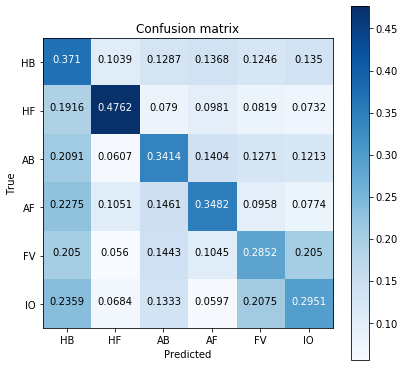

In [12]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X_2D = np.array(mat["X_2D"])
    categoryLabels = np.array(mat["categoryLabels"])     # get labels

    k = 180
    X = X_2D.copy()
    y = categoryLabels.ravel()
    X -= np.mean(X, axis=0)

    [u,s,v] = la.svd(X)                                   # pca with svd, using an optimum k
    v = v.transpose() 
    v_new = v[:,:k]
    X_pca = np.dot(X, v_new)

    X_training = X[:int(0.8*len(X))]
    X_validation = X[int(0.8*len(X)):]

    y_training = y[:int(0.8*len(X))]
    y_validation = y[int(0.8*len(X)):]

    num_classes = 6
    y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes) # We subtract 1 to convert to 0-index
    y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

    
    X_training = np.reshape(X_training, (-1, electrodes, N, 1))
    X_validation = np.reshape(X_validation, (-1, electrodes, N, 1))

    model = Sequential()

    model.add(Conv2D(8, kernel_size=3,input_shape=(124,32, 1), activation = 'relu'))
    model.add(Conv2D(8, kernel_size=3, activation = 'relu'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(16, kernel_size=2,activation = 'relu'))
    model.add(Conv2D(16, kernel_size=2,activation = 'relu'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())


    model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(16, activation = "relu"))
    model.add(Dense(6, activation = "softmax"))


    optimizer=Nadam(lr=0.004)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


    model.fit(X_training, y_training1hot,                               # train the model
              epochs=50,
              validation_data=(X_validation, y_validation1hot), 
              shuffle=True)

    y_validation_predictions = model.predict(X_validation, verbose=1)   # make predictions

    # create the confusion matrix
    cnf_matrix3 = confusion_matrix(y_validation-1, np.argmax(y_validation_predictions, axis=1))
    cm_cv3 += cnf_matrix3                                               # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation1hot)        # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                  # print mean accuracy

sum_by_row = np.sum(cm_cv3, 1)                                          # normalize the final confusion matrix
for i in range(0,6):
    cm_cv3[i,:] = cm_cv3[i,:] / sum_by_row[i]
    
plot_cm(np.round(cm_cv3, 4),6)                                          # plot the final confusion matrix

In [22]:
cm_cv3

array([[0.37103289, 0.10386613, 0.12867859, 0.13675707, 0.12463935,
        0.13502597],
       [0.19163763, 0.47619048, 0.07897793, 0.0981417 , 0.08188153,
        0.07317073],
       [0.20912767, 0.06065858, 0.34142114, 0.14038128, 0.12709417,
        0.12131716],
       [0.22748268, 0.10508083, 0.1460739 , 0.34815242, 0.09584296,
        0.07736721],
       [0.20496536, 0.05600462, 0.1443418 , 0.10450346, 0.2852194 ,
        0.20496536],
       [0.23594203, 0.0684058 , 0.13333333, 0.05971014, 0.20753623,
        0.29507246]])

### PCA with DFNN, 2 classes

Αρχικά τρέχουμε PCA με svd πριν, χρησιμοποιώντας k=180. Στη συνέχεια, εφαρμόζουμε ένα μοντέλο DFNN στις δύο κλάσεις, human face και inanimate object.

Train on 1382 samples, validate on 346 samples
Epoch 1/50
1382/1382 [==============================] - 1s 486us/step - loss: 1.5681 - accuracy: 0.6715 - val_loss: 1.3383 - val_accuracy: 0.7283
Epoch 2/50
1382/1382 [==============================] - 0s 185us/step - loss: 1.0166 - accuracy: 0.8350 - val_loss: 1.1381 - val_accuracy: 0.7283
Epoch 3/50
1382/1382 [==============================] - 0s 189us/step - loss: 0.6903 - accuracy: 0.9204 - val_loss: 1.0761 - val_accuracy: 0.7139
Epoch 4/50
1382/1382 [==============================] - 0s 193us/step - loss: 0.5348 - accuracy: 0.9508 - val_loss: 1.1414 - val_accuracy: 0.7399
Epoch 5/50
1382/1382 [==============================] - 0s 164us/step - loss: 0.4243 - accuracy: 0.9696 - val_loss: 1.7449 - val_accuracy: 0.6908
Epoch 6/50
1382/1382 [==============================] - 0s 173us/step - loss: 0.4038 - accuracy: 0.9674 - val_loss: 1.1839 - val_accuracy: 0.7601
Epoch 7/50
1382/1382 [==============================] - 0s 179us/step - loss:

Epoch 5/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.3044 - accuracy: 0.9805 - val_loss: 1.1775 - val_accuracy: 0.7659
Epoch 6/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.2663 - accuracy: 0.9826 - val_loss: 1.1312 - val_accuracy: 0.7746
Epoch 7/50
1382/1382 [==============================] - 0s 171us/step - loss: 0.2629 - accuracy: 0.9783 - val_loss: 1.0983 - val_accuracy: 0.7688
Epoch 8/50
1382/1382 [==============================] - 0s 169us/step - loss: 0.2034 - accuracy: 0.9884 - val_loss: 1.7702 - val_accuracy: 0.7197
Epoch 9/50
1382/1382 [==============================] - 0s 173us/step - loss: 0.2059 - accuracy: 0.9841 - val_loss: 1.1260 - val_accuracy: 0.7746
Epoch 10/50
1382/1382 [==============================] - 0s 172us/step - loss: 0.1426 - accuracy: 0.9964 - val_loss: 1.3949 - val_accuracy: 0.7341
Epoch 11/50
1382/1382 [==============================] - 0s 170us/step - loss: 0.1228 - accuracy: 0.9957 - val_loss: 1.5766

1383/1383 [==============================] - 0s 181us/step - loss: 0.2483 - accuracy: 0.9957 - val_loss: 1.6993 - val_accuracy: 0.7601
Epoch 10/50
1383/1383 [==============================] - 0s 177us/step - loss: 0.3008 - accuracy: 0.9740 - val_loss: 1.2637 - val_accuracy: 0.7399
Epoch 11/50
1383/1383 [==============================] - 0s 175us/step - loss: 0.2589 - accuracy: 0.9863 - val_loss: 1.4544 - val_accuracy: 0.7630
Epoch 12/50
1383/1383 [==============================] - 0s 178us/step - loss: 0.2503 - accuracy: 0.9826 - val_loss: 1.1829 - val_accuracy: 0.7919
Epoch 13/50
1383/1383 [==============================] - 0s 180us/step - loss: 0.2119 - accuracy: 0.9920 - val_loss: 1.5076 - val_accuracy: 0.7717
Epoch 14/50
1383/1383 [==============================] - 0s 177us/step - loss: 0.2062 - accuracy: 0.9906 - val_loss: 1.2235 - val_accuracy: 0.7861
Epoch 15/50
1383/1383 [==============================] - 0s 174us/step - loss: 0.1526 - accuracy: 0.9978 - val_loss: 1.4760 - val_

1382/1382 [==============================] - 0s 179us/step - loss: 0.2638 - accuracy: 0.9812 - val_loss: 0.9540 - val_accuracy: 0.7717
Epoch 14/50
1382/1382 [==============================] - 0s 179us/step - loss: 0.2000 - accuracy: 0.9935 - val_loss: 1.0753 - val_accuracy: 0.7659
Epoch 15/50
1382/1382 [==============================] - 0s 179us/step - loss: 0.1809 - accuracy: 0.9949 - val_loss: 1.1358 - val_accuracy: 0.7746
Epoch 16/50
1382/1382 [==============================] - 0s 176us/step - loss: 0.1648 - accuracy: 0.9935 - val_loss: 1.1720 - val_accuracy: 0.7803
Epoch 17/50
1382/1382 [==============================] - 0s 180us/step - loss: 0.1616 - accuracy: 0.9906 - val_loss: 1.0513 - val_accuracy: 0.8064
Epoch 18/50
1382/1382 [==============================] - 0s 179us/step - loss: 0.1299 - accuracy: 0.9964 - val_loss: 1.1227 - val_accuracy: 0.7890
Epoch 19/50
1382/1382 [==============================] - 0s 177us/step - loss: 0.1072 - accuracy: 0.9993 - val_loss: 1.2585 - val_

1382/1382 [==============================] - 0s 168us/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 1.8844 - val_accuracy: 0.7428
Epoch 18/50
1382/1382 [==============================] - 0s 163us/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 1.9460 - val_accuracy: 0.7341
Epoch 19/50
1382/1382 [==============================] - 0s 166us/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 1.9986 - val_accuracy: 0.7399
Epoch 20/50
1382/1382 [==============================] - 0s 166us/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 2.0472 - val_accuracy: 0.7457
Epoch 21/50
1382/1382 [==============================] - 0s 164us/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 2.1295 - val_accuracy: 0.7543
Epoch 22/50
1382/1382 [==============================] - 0s 162us/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 2.1739 - val_accuracy: 0.7514
Epoch 23/50
1382/1382 [==============================] - 0s 164us/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 2.2293 - val_

1382/1382 [==============================] - 0s 172us/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 2.4492 - val_accuracy: 0.6994
Epoch 22/50
1382/1382 [==============================] - 0s 164us/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 2.5148 - val_accuracy: 0.7052
Epoch 23/50
1382/1382 [==============================] - 0s 163us/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 2.5670 - val_accuracy: 0.7110
Epoch 24/50
1382/1382 [==============================] - 0s 168us/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 2.5975 - val_accuracy: 0.7023
Epoch 25/50
1382/1382 [==============================] - 0s 166us/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 2.6570 - val_accuracy: 0.7081
Epoch 26/50
1382/1382 [==============================] - 0s 162us/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 2.6437 - val_accuracy: 0.7081
Epoch 27/50
1382/1382 [==============================] - 0s 162us/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 2.7471 - val_

1382/1382 [==============================] - 0s 165us/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.9701 - val_accuracy: 0.8382
Epoch 26/50
1382/1382 [==============================] - 0s 161us/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.9852 - val_accuracy: 0.8439
Epoch 27/50
1382/1382 [==============================] - 0s 159us/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 1.0008 - val_accuracy: 0.8410
Epoch 28/50
1382/1382 [==============================] - 0s 164us/step - loss: 0.5746 - accuracy: 0.9399 - val_loss: 1.0110 - val_accuracy: 0.8266
Epoch 29/50
1382/1382 [==============================] - 0s 170us/step - loss: 0.2291 - accuracy: 0.9703 - val_loss: 0.7551 - val_accuracy: 0.8410
Epoch 30/50
1382/1382 [==============================] - 0s 176us/step - loss: 0.1264 - accuracy: 0.9942 - val_loss: 0.8687 - val_accuracy: 0.8121
Epoch 31/50
1382/1382 [==============================] - 0s 177us/step - loss: 0.1043 - accuracy: 0.9935 - val_loss: 0.9595 - val_

1382/1382 [==============================] - 0s 180us/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 2.8449 - val_accuracy: 0.6705
Epoch 30/50
1382/1382 [==============================] - 0s 170us/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 2.8719 - val_accuracy: 0.6647
Epoch 31/50
1382/1382 [==============================] - 0s 173us/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 2.9309 - val_accuracy: 0.6647
Epoch 32/50
1382/1382 [==============================] - 0s 173us/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 2.9569 - val_accuracy: 0.6647
Epoch 33/50
1382/1382 [==============================] - 0s 177us/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 3.0050 - val_accuracy: 0.6618
Epoch 34/50
1382/1382 [==============================] - 0s 176us/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 3.0194 - val_accuracy: 0.6618
Epoch 35/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 3.0656 - val_

1382/1382 [==============================] - 0s 176us/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 1.2891 - val_accuracy: 0.7630
Epoch 34/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 1.2995 - val_accuracy: 0.7630
Epoch 35/50
1382/1382 [==============================] - 0s 173us/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.3156 - val_accuracy: 0.7630
Epoch 36/50
1382/1382 [==============================] - 0s 176us/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.3361 - val_accuracy: 0.7601
Epoch 37/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.3461 - val_accuracy: 0.7630
Epoch 38/50
1382/1382 [==============================] - 0s 175us/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.3408 - val_accuracy: 0.7717
Epoch 39/50
1382/1382 [==============================] - 0s 176us/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.3506 - val_

1382/1382 [==============================] - 0s 155us/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 2.4641 - val_accuracy: 0.7370
Epoch 38/50
1382/1382 [==============================] - 0s 156us/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 2.5013 - val_accuracy: 0.7370
Epoch 39/50
1382/1382 [==============================] - 0s 151us/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 2.5405 - val_accuracy: 0.7370
Epoch 40/50
1382/1382 [==============================] - 0s 148us/step - loss: 0.6305 - accuracy: 0.9255 - val_loss: 0.9480 - val_accuracy: 0.7457
Epoch 41/50
1382/1382 [==============================] - 0s 151us/step - loss: 0.2684 - accuracy: 0.9682 - val_loss: 1.2826 - val_accuracy: 0.7139
Epoch 42/50
1382/1382 [==============================] - 0s 153us/step - loss: 0.1747 - accuracy: 0.9848 - val_loss: 1.4160 - val_accuracy: 0.7225
Epoch 43/50
1382/1382 [==============================] - 0s 153us/step - loss: 0.1139 - accuracy: 0.9971 - val_loss: 1.5839 - val_

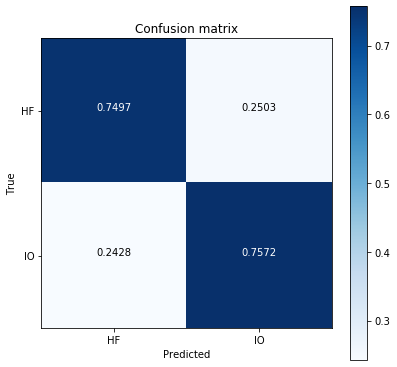

In [7]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X = np.array(mat["X_2D"])
    y = np.array(mat["exemplarLabels"]).ravel()    # get labels

    y_bin =[]
    X_bin = []
    
    for i in range(0,len(X)):                   # keep only the hf and the io category
        if (12 < y[i] < 25):
            y_bin.append(0)                     # set class hf as 0
            X_bin.append(X[i])
        elif (60 < y[i]):                       # set class io as 1
            y_bin.append(1)
            X_bin.append(X[i])

    X_bin = np.array(X_bin)
    y_bin = np.array(y_bin).ravel()

    [u,s,v] = la.svd(X_bin)                      # pca with svd using an optimum k
    v = v.transpose() 
    v_new = v[:,:180]
    X_bin = np.dot(X_bin, v_new)

    X_training = X_bin[:int(0.8*len(X_bin))]     # create train and test sets
    X_validation = X_bin[int(0.8*len(X_bin)):]

    y_training = y_bin[:int(0.8*len(X_bin))]
    y_validation =y_bin[int(0.8*len(X_bin)):]

    num_classes = 2                              # we have only 2 classes, hf and io

    # dfnn model
    model = Sequential()                       
    model.add(Dense(160, input_dim=180, activation='relu'))
    model.add(Dense(140, activation='tanh',activity_regularizer=regularizers.l1(1e-3))) 
    model.add(Dense(120, activation='tanh',kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(64, input_dim=8, activation='tanh'))
    model.add(Dense(32, activation='relu',activity_regularizer=regularizers.l2(1e-7)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(X_training, y_training,                                 # train the model
              epochs=50, 
              validation_data=(X_validation, y_validation), 
              shuffle=True)

    _, accuracy = model.evaluate(X_validation, y_validation)
    print('Accuracy: %.2f' % (accuracy*100))

    y_validation_predictions = np.round(model.predict(X_validation, verbose=1))  # make predictions

    # create the confusion matrix
    cnf_matrix4 = confusion_matrix(y_validation, y_validation_predictions)
    cm_cv4 += cnf_matrix4                                           # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation)        # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))              # print mean accuracy

sum_by_row = np.sum(cm_cv4, 1)                                      # normalize the final confusion matrix
for i in range(0,2):
    cm_cv4[i,:] = cm_cv4[i,:] / sum_by_row[i]
    
plot_cm(np.round(cm_cv4, 4),2)                                      # plot the final confusion matrix

In [14]:
cm_cv4

array([[0.74971031, 0.25028969],
       [0.24279123, 0.75720877]])

### Simple CNN, 2 classes

Εφαρμόζουμε το απλό cnn στις δύο κλάσεις, human face και inanimate object.

Train on 1382 samples, validate on 346 samples
Epoch 1/50
1382/1382 [==============================] - 1s 1ms/step - loss: 1.3689 - accuracy: 0.5145 - val_loss: 0.9608 - val_accuracy: 0.5087
Epoch 2/50
1382/1382 [==============================] - 1s 558us/step - loss: 1.0004 - accuracy: 0.5043 - val_loss: 0.9497 - val_accuracy: 0.5087
Epoch 3/50
1382/1382 [==============================] - 1s 563us/step - loss: 0.9451 - accuracy: 0.5065 - val_loss: 0.8667 - val_accuracy: 0.5087
Epoch 4/50
1382/1382 [==============================] - 1s 560us/step - loss: 0.8503 - accuracy: 0.5586 - val_loss: 0.8814 - val_accuracy: 0.4913
Epoch 5/50
1382/1382 [==============================] - 1s 561us/step - loss: 0.8129 - accuracy: 0.6816 - val_loss: 0.8161 - val_accuracy: 0.5578
Epoch 6/50
1382/1382 [==============================] - 1s 563us/step - loss: 0.7619 - accuracy: 0.7359 - val_loss: 0.7662 - val_accuracy: 0.6965
Epoch 7/50
1382/1382 [==============================] - 1s 566us/step - loss: 0

1382/1382 [==============================] - 1s 561us/step - loss: 0.7523 - accuracy: 0.5022 - val_loss: 1.0490 - val_accuracy: 0.5000
Epoch 6/50
1382/1382 [==============================] - 1s 558us/step - loss: 0.7744 - accuracy: 0.5702 - val_loss: 0.7612 - val_accuracy: 0.6301
Epoch 7/50
1382/1382 [==============================] - 1s 561us/step - loss: 0.7562 - accuracy: 0.6961 - val_loss: 0.7486 - val_accuracy: 0.7254
Epoch 8/50
1382/1382 [==============================] - 1s 563us/step - loss: 0.7142 - accuracy: 0.7851 - val_loss: 0.8480 - val_accuracy: 0.5607
Epoch 9/50
1382/1382 [==============================] - 1s 561us/step - loss: 0.7026 - accuracy: 0.8119 - val_loss: 0.7708 - val_accuracy: 0.7370
Epoch 10/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.6519 - accuracy: 0.8596 - val_loss: 0.7367 - val_accuracy: 0.7919
Epoch 11/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.6036 - accuracy: 0.8958 - val_loss: 0.7749 - val_accu

Epoch 10/50
1383/1383 [==============================] - 1s 557us/step - loss: 0.6506 - accuracy: 0.8915 - val_loss: 0.8397 - val_accuracy: 0.7254
Epoch 11/50
1383/1383 [==============================] - 1s 561us/step - loss: 0.6357 - accuracy: 0.8937 - val_loss: 0.8225 - val_accuracy: 0.7919
Epoch 12/50
1383/1383 [==============================] - 1s 561us/step - loss: 0.6831 - accuracy: 0.8952 - val_loss: 0.8731 - val_accuracy: 0.7341
Epoch 13/50
1383/1383 [==============================] - 1s 561us/step - loss: 0.6387 - accuracy: 0.8792 - val_loss: 0.9634 - val_accuracy: 0.6792
Epoch 14/50
1383/1383 [==============================] - 1s 560us/step - loss: 0.5786 - accuracy: 0.8901 - val_loss: 0.7081 - val_accuracy: 0.7688
Epoch 15/50
1383/1383 [==============================] - 1s 558us/step - loss: 0.5570 - accuracy: 0.9060 - val_loss: 0.6649 - val_accuracy: 0.8121
Epoch 16/50
1383/1383 [==============================] - 1s 559us/step - loss: 0.5495 - accuracy: 0.9096 - val_loss: 0

Epoch 15/50
1382/1382 [==============================] - 1s 548us/step - loss: 0.4507 - accuracy: 0.9551 - val_loss: 0.7359 - val_accuracy: 0.7775
Epoch 16/50
1382/1382 [==============================] - 1s 554us/step - loss: 0.4702 - accuracy: 0.9486 - val_loss: 0.8309 - val_accuracy: 0.7486
Epoch 17/50
1382/1382 [==============================] - 1s 560us/step - loss: 0.4339 - accuracy: 0.9508 - val_loss: 0.6959 - val_accuracy: 0.7832
Epoch 18/50
1382/1382 [==============================] - 1s 569us/step - loss: 0.3868 - accuracy: 0.9689 - val_loss: 0.6317 - val_accuracy: 0.7919
Epoch 19/50
1382/1382 [==============================] - 1s 563us/step - loss: 0.3877 - accuracy: 0.9631 - val_loss: 0.6774 - val_accuracy: 0.8092
Epoch 20/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.3841 - accuracy: 0.9573 - val_loss: 0.6881 - val_accuracy: 0.8035
Epoch 21/50
1382/1382 [==============================] - 1s 567us/step - loss: 0.4473 - accuracy: 0.9638 - val_loss: 0

Epoch 20/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.2714 - accuracy: 0.9805 - val_loss: 0.5659 - val_accuracy: 0.7977
Epoch 21/50
1382/1382 [==============================] - 1s 560us/step - loss: 0.2570 - accuracy: 0.9870 - val_loss: 0.5010 - val_accuracy: 0.8642
Epoch 22/50
1382/1382 [==============================] - 1s 557us/step - loss: 0.2649 - accuracy: 0.9790 - val_loss: 0.5397 - val_accuracy: 0.8555
Epoch 23/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.2746 - accuracy: 0.9768 - val_loss: 0.5200 - val_accuracy: 0.8757
Epoch 24/50
1382/1382 [==============================] - 1s 554us/step - loss: 0.2640 - accuracy: 0.9826 - val_loss: 0.8901 - val_accuracy: 0.8555
Epoch 25/50
1382/1382 [==============================] - 1s 557us/step - loss: 0.3384 - accuracy: 0.9805 - val_loss: 0.6004 - val_accuracy: 0.8035
Epoch 26/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.2894 - accuracy: 0.9797 - val_loss: 0

Epoch 25/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.3464 - accuracy: 0.9732 - val_loss: 0.7999 - val_accuracy: 0.7514
Epoch 26/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.3185 - accuracy: 0.9776 - val_loss: 0.7280 - val_accuracy: 0.7717
Epoch 27/50
1382/1382 [==============================] - 1s 560us/step - loss: 0.3361 - accuracy: 0.9682 - val_loss: 0.7734 - val_accuracy: 0.7341
Epoch 28/50
1382/1382 [==============================] - 1s 562us/step - loss: 0.3246 - accuracy: 0.9754 - val_loss: 0.7519 - val_accuracy: 0.7572
Epoch 29/50
1382/1382 [==============================] - 1s 559us/step - loss: 0.3201 - accuracy: 0.9819 - val_loss: 0.8492 - val_accuracy: 0.7486
Epoch 30/50
1382/1382 [==============================] - 1s 558us/step - loss: 0.3255 - accuracy: 0.9718 - val_loss: 0.8217 - val_accuracy: 0.7630
Epoch 31/50
1382/1382 [==============================] - 1s 557us/step - loss: 0.3269 - accuracy: 0.9703 - val_loss: 0

Epoch 30/50
1382/1382 [==============================] - 1s 550us/step - loss: 0.4342 - accuracy: 0.9197 - val_loss: 0.5339 - val_accuracy: 0.8584
Epoch 31/50
1382/1382 [==============================] - 1s 548us/step - loss: 0.4417 - accuracy: 0.9175 - val_loss: 0.5026 - val_accuracy: 0.8555
Epoch 32/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.4144 - accuracy: 0.9211 - val_loss: 0.4804 - val_accuracy: 0.8555
Epoch 33/50
1382/1382 [==============================] - 1s 548us/step - loss: 0.4148 - accuracy: 0.9226 - val_loss: 0.5006 - val_accuracy: 0.8613
Epoch 34/50
1382/1382 [==============================] - 1s 549us/step - loss: 0.3998 - accuracy: 0.9276 - val_loss: 0.4905 - val_accuracy: 0.8642
Epoch 35/50
1382/1382 [==============================] - 1s 550us/step - loss: 0.3939 - accuracy: 0.9284 - val_loss: 0.4766 - val_accuracy: 0.8960
Epoch 36/50
1382/1382 [==============================] - 1s 570us/step - loss: 0.4081 - accuracy: 0.9226 - val_loss: 0

Epoch 35/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.4027 - accuracy: 0.9588 - val_loss: 0.8312 - val_accuracy: 0.7399
Epoch 36/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.4013 - accuracy: 0.9674 - val_loss: 0.9021 - val_accuracy: 0.7312
Epoch 37/50
1382/1382 [==============================] - 1s 554us/step - loss: 0.3950 - accuracy: 0.9740 - val_loss: 0.9911 - val_accuracy: 0.7139
Epoch 38/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.3485 - accuracy: 0.9812 - val_loss: 0.8111 - val_accuracy: 0.7746
Epoch 39/50
1382/1382 [==============================] - 1s 557us/step - loss: 0.3144 - accuracy: 0.9826 - val_loss: 0.8658 - val_accuracy: 0.7399
Epoch 40/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.3161 - accuracy: 0.9834 - val_loss: 1.3001 - val_accuracy: 0.6821
Epoch 41/50
1382/1382 [==============================] - 1s 558us/step - loss: 0.3025 - accuracy: 0.9855 - val_loss: 0

Epoch 40/50
1382/1382 [==============================] - 1s 556us/step - loss: 0.2384 - accuracy: 0.9920 - val_loss: 0.8094 - val_accuracy: 0.8728
Epoch 41/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.2207 - accuracy: 0.9935 - val_loss: 0.7609 - val_accuracy: 0.8728
Epoch 42/50
1382/1382 [==============================] - 1s 556us/step - loss: 0.2066 - accuracy: 0.9913 - val_loss: 0.9650 - val_accuracy: 0.8613
Epoch 43/50
1382/1382 [==============================] - 1s 558us/step - loss: 0.2315 - accuracy: 0.9942 - val_loss: 0.7128 - val_accuracy: 0.8786
Epoch 44/50
1382/1382 [==============================] - 1s 555us/step - loss: 0.2131 - accuracy: 0.9942 - val_loss: 0.8995 - val_accuracy: 0.8844
Epoch 45/50
1382/1382 [==============================] - 1s 558us/step - loss: 0.2161 - accuracy: 0.9906 - val_loss: 1.3349 - val_accuracy: 0.7775
Epoch 46/50
1382/1382 [==============================] - 1s 556us/step - loss: 0.2318 - accuracy: 0.9863 - val_loss: 0

Epoch 45/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.3843 - accuracy: 0.9240 - val_loss: 0.5904 - val_accuracy: 0.7919
Epoch 46/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.3762 - accuracy: 0.9262 - val_loss: 0.6512 - val_accuracy: 0.7543
Epoch 47/50
1382/1382 [==============================] - 1s 550us/step - loss: 0.9833 - accuracy: 0.5224 - val_loss: 0.9763 - val_accuracy: 0.4971
Epoch 48/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.9109 - accuracy: 0.5304 - val_loss: 0.8338 - val_accuracy: 0.6994
Epoch 49/50
1382/1382 [==============================] - 1s 553us/step - loss: 0.7545 - accuracy: 0.7576 - val_loss: 1.7143 - val_accuracy: 0.5376
Epoch 50/50
346/346 [==============================] - 0s 127us/step
 
Accuracy: 81.45


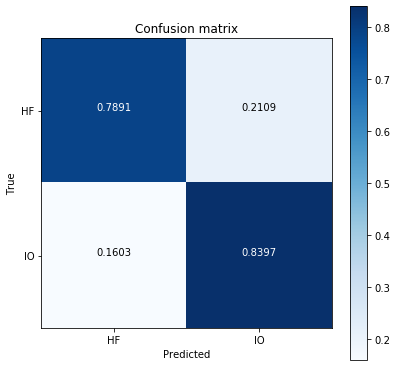

In [8]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X = np.array(mat["X_2D"])
    y = np.array(mat["exemplarLabels"]).ravel()    # get labels

    y_bin =[]
    X_bin = []
    
    for i in range(0,len(X)):                      # keep only the hf and the io category
        if (12 < y[i] < 25):
            y_bin.append(0)                        # set class hf as 0
            X_bin.append(X[i])
        elif (60 < y[i]):                          # set class io as 0
            y_bin.append(1)
            X_bin.append(X[i])

    X_bin = np.array(X_bin)
    y_bin = np.array(y_bin).ravel()

    X_training = X_bin[:int(0.8*len(X_bin))]       # create train and test sets
    X_validation = X_bin[int(0.8*len(X_bin)):]
    
    y_training = y_bin[:int(0.8*len(X_bin))]
    y_validation =y_bin[int(0.8*len(X_bin)):]

    # reshape to treat the data like images (124x32)
    X_training = np.reshape(X_training, (-1, 124, 32, 1))
    X_validation = np.reshape(X_validation, (-1, 124, 32, 1))

    num_classes = 2                                # we have only 2 classes, hf and io

    # cnn model
    model = Sequential()                           

    model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:],  activation = "relu"))
    model.add(Flatten())
    model.add(Dense(units=128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-3),
                    activity_regularizer=regularizers.l2(1e-3),
                    activation = "relu"))
    model.add(Dropout(0.15))
    model.add(Dense(units=num_classes-1,activity_regularizer=regularizers.l2(1e-5), activation = "sigmoid"))

    model.compile(loss=keras.losses.BinaryCrossentropy(),
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(X_training, y_training,                                              # train the model
              epochs=50,
              validation_data=(X_validation, y_validation), 
              shuffle=True)

    y_validation_predictions = np.round(model.predict(X_validation, verbose=1))    # make predictions

    # create the confusion matrix
    cnf_matrix5 = confusion_matrix(y_validation, y_validation_predictions)
    cm_cv5 += cnf_matrix5                                                          # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation)                       # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                             # print mean accuracy

sum_by_row = np.sum(cm_cv5, 1)                                                     # normalize the final confusion matrix
for i in range(0,2):
    cm_cv5[i,:] = cm_cv5[i,:] / sum_by_row[i]
    
plot_cm(np.round(cm_cv5, 4),2)                                                     # plot the final confusion matrix

In [15]:
cm_cv5

array([[0.78910776, 0.21089224],
       [0.16032295, 0.83967705]])

### Simple CNN, hf class, exemplar

Εφαρμόζουμε το απλό cnn για τις 12 κατηγορίες της κλάσης human face.

Train on 691 samples, validate on 173 samples
Epoch 1/50
691/691 [==============================] - 1s 1ms/step - loss: 4.0592 - accuracy: 0.0753 - val_loss: 2.9377 - val_accuracy: 0.0809
Epoch 2/50
691/691 [==============================] - 0s 662us/step - loss: 2.9086 - accuracy: 0.0810 - val_loss: 2.9606 - val_accuracy: 0.0867
Epoch 3/50
691/691 [==============================] - 0s 571us/step - loss: 2.7898 - accuracy: 0.0637 - val_loss: 2.7192 - val_accuracy: 0.0809
Epoch 4/50
691/691 [==============================] - 0s 645us/step - loss: 2.7957 - accuracy: 0.0854 - val_loss: 2.7006 - val_accuracy: 0.0809
Epoch 5/50
691/691 [==============================] - 0s 636us/step - loss: 2.6859 - accuracy: 0.0854 - val_loss: 2.6563 - val_accuracy: 0.0636
Epoch 6/50
691/691 [==============================] - 0s 684us/step - loss: 2.7222 - accuracy: 0.0709 - val_loss: 2.9393 - val_accuracy: 0.0809
Epoch 7/50
691/691 [==============================] - 0s 672us/step - loss: 2.8473 - accurac

691/691 [==============================] - 0s 555us/step - loss: 2.5102 - accuracy: 0.2489 - val_loss: 2.6871 - val_accuracy: 0.1214
Epoch 7/50
691/691 [==============================] - 0s 549us/step - loss: 2.4616 - accuracy: 0.2880 - val_loss: 2.7218 - val_accuracy: 0.1156
Epoch 8/50
691/691 [==============================] - 0s 552us/step - loss: 2.4055 - accuracy: 0.3777 - val_loss: 2.7508 - val_accuracy: 0.1387
Epoch 9/50
691/691 [==============================] - 0s 549us/step - loss: 2.2773 - accuracy: 0.4544 - val_loss: 2.7995 - val_accuracy: 0.1156
Epoch 10/50
691/691 [==============================] - 0s 556us/step - loss: 2.1893 - accuracy: 0.5239 - val_loss: 3.0141 - val_accuracy: 0.1445
Epoch 11/50
691/691 [==============================] - 0s 552us/step - loss: 2.1664 - accuracy: 0.5876 - val_loss: 3.2046 - val_accuracy: 0.1329
Epoch 12/50
691/691 [==============================] - 0s 561us/step - loss: 2.1479 - accuracy: 0.6483 - val_loss: 3.0542 - val_accuracy: 0.1272


692/692 [==============================] - 0s 560us/step - loss: 2.5981 - accuracy: 0.1647 - val_loss: 2.6520 - val_accuracy: 0.0751
Epoch 12/50
692/692 [==============================] - 0s 554us/step - loss: 2.5340 - accuracy: 0.1618 - val_loss: 2.6685 - val_accuracy: 0.0867
Epoch 13/50
692/692 [==============================] - 0s 554us/step - loss: 2.4828 - accuracy: 0.1850 - val_loss: 2.6900 - val_accuracy: 0.0867
Epoch 14/50
692/692 [==============================] - 0s 555us/step - loss: 2.4119 - accuracy: 0.1965 - val_loss: 2.8202 - val_accuracy: 0.1156
Epoch 15/50
692/692 [==============================] - 0s 553us/step - loss: 2.3970 - accuracy: 0.1994 - val_loss: 2.7042 - val_accuracy: 0.0694
Epoch 16/50
692/692 [==============================] - 0s 553us/step - loss: 2.3838 - accuracy: 0.2153 - val_loss: 2.7514 - val_accuracy: 0.1040
Epoch 17/50
692/692 [==============================] - 0s 551us/step - loss: 2.3056 - accuracy: 0.2370 - val_loss: 3.3576 - val_accuracy: 0.08

691/691 [==============================] - 0s 568us/step - loss: 1.6655 - accuracy: 0.8379 - val_loss: 3.3737 - val_accuracy: 0.1734
Epoch 17/50
691/691 [==============================] - 0s 563us/step - loss: 1.6729 - accuracy: 0.8712 - val_loss: 3.4719 - val_accuracy: 0.1329
Epoch 18/50
691/691 [==============================] - 0s 558us/step - loss: 1.6001 - accuracy: 0.8915 - val_loss: 3.4361 - val_accuracy: 0.1676
Epoch 19/50
691/691 [==============================] - 0s 559us/step - loss: 1.3969 - accuracy: 0.9247 - val_loss: 3.5675 - val_accuracy: 0.1445
Epoch 20/50
691/691 [==============================] - 0s 558us/step - loss: 1.3204 - accuracy: 0.9233 - val_loss: 3.7434 - val_accuracy: 0.1618
Epoch 21/50
691/691 [==============================] - 0s 561us/step - loss: 1.2899 - accuracy: 0.9421 - val_loss: 3.4500 - val_accuracy: 0.1850
Epoch 22/50
691/691 [==============================] - 0s 559us/step - loss: 1.2704 - accuracy: 0.9436 - val_loss: 3.3870 - val_accuracy: 0.13

691/691 [==============================] - 0s 565us/step - loss: 2.3956 - accuracy: 0.1534 - val_loss: 2.7104 - val_accuracy: 0.0925
Epoch 22/50
691/691 [==============================] - 0s 558us/step - loss: 2.3650 - accuracy: 0.1621 - val_loss: 2.7291 - val_accuracy: 0.0925
Epoch 23/50
691/691 [==============================] - 0s 561us/step - loss: 2.3835 - accuracy: 0.1491 - val_loss: 2.7270 - val_accuracy: 0.0925
Epoch 24/50
691/691 [==============================] - 0s 563us/step - loss: 2.4075 - accuracy: 0.1548 - val_loss: 2.7811 - val_accuracy: 0.0925
Epoch 25/50
691/691 [==============================] - 0s 561us/step - loss: 2.4037 - accuracy: 0.1708 - val_loss: 2.6512 - val_accuracy: 0.0751
Epoch 26/50
691/691 [==============================] - 0s 565us/step - loss: 2.3434 - accuracy: 0.1679 - val_loss: 2.6993 - val_accuracy: 0.0694
Epoch 27/50
691/691 [==============================] - 0s 562us/step - loss: 2.3689 - accuracy: 0.1693 - val_loss: 2.6861 - val_accuracy: 0.09

691/691 [==============================] - 0s 563us/step - loss: 1.8552 - accuracy: 0.5456 - val_loss: 2.9084 - val_accuracy: 0.1561
Epoch 27/50
691/691 [==============================] - 0s 555us/step - loss: 1.8137 - accuracy: 0.5601 - val_loss: 2.8698 - val_accuracy: 0.1850
Epoch 28/50
691/691 [==============================] - 0s 555us/step - loss: 1.7457 - accuracy: 0.5861 - val_loss: 2.8433 - val_accuracy: 0.1734
Epoch 29/50
691/691 [==============================] - 0s 556us/step - loss: 1.7759 - accuracy: 0.5630 - val_loss: 2.9715 - val_accuracy: 0.1965
Epoch 30/50
691/691 [==============================] - 0s 556us/step - loss: 1.7003 - accuracy: 0.5919 - val_loss: 2.9709 - val_accuracy: 0.1908
Epoch 31/50
691/691 [==============================] - 0s 556us/step - loss: 2.0427 - accuracy: 0.5861 - val_loss: 3.1267 - val_accuracy: 0.1272
Epoch 32/50
691/691 [==============================] - 0s 553us/step - loss: 1.7383 - accuracy: 0.6049 - val_loss: 3.0984 - val_accuracy: 0.17

691/691 [==============================] - 0s 563us/step - loss: 0.9697 - accuracy: 0.9291 - val_loss: 3.0690 - val_accuracy: 0.1676
Epoch 32/50
691/691 [==============================] - 0s 558us/step - loss: 0.9465 - accuracy: 0.9132 - val_loss: 3.2403 - val_accuracy: 0.1792
Epoch 33/50
691/691 [==============================] - 0s 558us/step - loss: 0.9443 - accuracy: 0.9161 - val_loss: 3.1337 - val_accuracy: 0.1850
Epoch 34/50
691/691 [==============================] - 0s 556us/step - loss: 0.9252 - accuracy: 0.9305 - val_loss: 3.2592 - val_accuracy: 0.1618
Epoch 35/50
691/691 [==============================] - 0s 559us/step - loss: 0.9023 - accuracy: 0.9407 - val_loss: 3.2207 - val_accuracy: 0.1503
Epoch 36/50
691/691 [==============================] - 0s 558us/step - loss: 0.9316 - accuracy: 0.9305 - val_loss: 3.2083 - val_accuracy: 0.1734
Epoch 37/50
691/691 [==============================] - 0s 558us/step - loss: 0.8600 - accuracy: 0.9349 - val_loss: 3.2426 - val_accuracy: 0.16

691/691 [==============================] - 0s 561us/step - loss: 0.7714 - accuracy: 0.9870 - val_loss: 3.7393 - val_accuracy: 0.1040
Epoch 37/50
691/691 [==============================] - 0s 559us/step - loss: 0.7306 - accuracy: 0.9884 - val_loss: 3.6680 - val_accuracy: 0.1156
Epoch 38/50
691/691 [==============================] - 0s 553us/step - loss: 0.7357 - accuracy: 0.9870 - val_loss: 3.8586 - val_accuracy: 0.0867
Epoch 39/50
691/691 [==============================] - 0s 556us/step - loss: 0.7470 - accuracy: 0.9870 - val_loss: 3.6177 - val_accuracy: 0.0983
Epoch 40/50
691/691 [==============================] - 0s 559us/step - loss: 0.7431 - accuracy: 0.9855 - val_loss: 3.7543 - val_accuracy: 0.0925
Epoch 41/50
691/691 [==============================] - 0s 559us/step - loss: 0.6715 - accuracy: 0.9884 - val_loss: 3.6453 - val_accuracy: 0.0867
Epoch 42/50
691/691 [==============================] - 0s 559us/step - loss: 0.6558 - accuracy: 0.9870 - val_loss: 3.7076 - val_accuracy: 0.06

691/691 [==============================] - 0s 559us/step - loss: 0.8898 - accuracy: 0.9349 - val_loss: 6.3318 - val_accuracy: 0.1561
Epoch 42/50
691/691 [==============================] - 0s 561us/step - loss: 0.8976 - accuracy: 0.9276 - val_loss: 6.5169 - val_accuracy: 0.1329
Epoch 43/50
691/691 [==============================] - 0s 563us/step - loss: 0.8598 - accuracy: 0.9551 - val_loss: 5.7456 - val_accuracy: 0.1329
Epoch 44/50
691/691 [==============================] - 0s 562us/step - loss: 0.9373 - accuracy: 0.9276 - val_loss: 5.4849 - val_accuracy: 0.1040
Epoch 45/50
691/691 [==============================] - 0s 553us/step - loss: 0.8670 - accuracy: 0.9378 - val_loss: 5.7633 - val_accuracy: 0.0925
Epoch 46/50
691/691 [==============================] - 0s 558us/step - loss: 0.7963 - accuracy: 0.9653 - val_loss: 5.4977 - val_accuracy: 0.1272
Epoch 47/50
691/691 [==============================] - 0s 558us/step - loss: 0.7633 - accuracy: 0.9522 - val_loss: 5.0162 - val_accuracy: 0.15

691/691 [==============================] - 0s 558us/step - loss: 0.7491 - accuracy: 0.9421 - val_loss: 3.3706 - val_accuracy: 0.1445
Epoch 47/50
691/691 [==============================] - 0s 555us/step - loss: 0.7339 - accuracy: 0.9407 - val_loss: 3.4233 - val_accuracy: 0.1040
Epoch 48/50
691/691 [==============================] - 0s 553us/step - loss: 0.7053 - accuracy: 0.9624 - val_loss: 3.6285 - val_accuracy: 0.1503
Epoch 49/50
691/691 [==============================] - 0s 555us/step - loss: 0.7284 - accuracy: 0.9421 - val_loss: 3.3864 - val_accuracy: 0.1387
Epoch 50/50
173/173 [==============================] - 0s 145us/step
 
Accuracy: 14.34


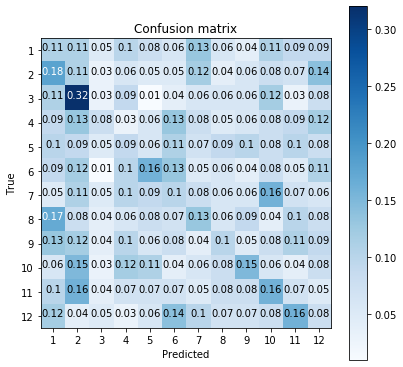

In [10]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X = np.array(mat["X_2D"])
    y = np.array(mat["exemplarLabels"]).ravel()     # get labels (exemplar)

    y_hf =[]
    X_hf = []
    for i in range(0,len(X)):                       # keep only the hf category
        if (12 < y[i] < 25):
            y_hf.append(y[i])
            X_hf.append(X[i])

    X_hf = np.array(X_hf)
    y_hf = np.array(y_hf).ravel()

    le = preprocessing.LabelEncoder()
    le.fit(y_hf)
    y_hf = le.transform(y_hf)

    X_training = X_hf[:int(0.8*len(X_hf))]          # create the train and test sets
    X_validation = X_hf[int(0.8*len(X_hf)):]

    y_training = y_hf[:int(0.8*len(X_hf))]
    y_validation = y_hf[int(0.8*len(X_hf)):]

    num_classes = 12                                # we have 12 classes
    
    y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes)      # subtract 1 to convert to 0-index
    y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

    # reshape to treat the data like images (124x32)
    X_training = np.reshape(X_training, (-1, electrodes, N, 1))
    X_validation = np.reshape(X_validation, (-1, electrodes, N, 1))

    # cnn model
    model = Sequential()                            

    model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:], activation = "relu"))
    model.add(Flatten())
    model.add(Dense(units=128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-3),
                    activity_regularizer=regularizers.l2(1e-3),
                    activation = "relu"))
    model.add(Dropout(0.15))
    model.add(Dense(units=num_classes,activity_regularizer=regularizers.l2(1e-5), activation = "softmax"))

    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(X_training, y_training1hot,                                # train the model
              epochs=50, 
              validation_data=(X_validation, y_validation1hot), 
              shuffle=True)

    y_validation_predictions = model.predict(X_validation, verbose=1)    # make predictions

    # create the confusion matrex
    cnf_matrix6 = confusion_matrix(y_validation+1, np.argmax(y_validation_predictions, axis=1)+1)
    cm_cv6 += cnf_matrix6                                                # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation1hot)         # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                   # print mean accuracy

sum_by_row = np.sum(cm_cv6, 1)                                           # normalize the final confusion matrix
for i in range(0,12):
    cm_cv6[i,:] = cm_cv6[i,:] / sum_by_row[i]
        
plot_cm(np.round(cm_cv6, 2),12)                                          # plot the final confusion matrix

In [16]:
cm_cv6

array([[0.11347518, 0.10638298, 0.04964539, 0.09929078, 0.07801418,
        0.05673759, 0.12765957, 0.05673759, 0.03546099, 0.10638298,
        0.08510638, 0.08510638],
       [0.17808219, 0.10958904, 0.03424658, 0.06164384, 0.04794521,
        0.05479452, 0.12328767, 0.04109589, 0.06164384, 0.07534247,
        0.06849315, 0.14383562],
       [0.11034483, 0.32413793, 0.02758621, 0.08965517, 0.00689655,
        0.04137931, 0.05517241, 0.06206897, 0.05517241, 0.11724138,
        0.03448276, 0.07586207],
       [0.08965517, 0.13103448, 0.07586207, 0.02758621, 0.06206897,
        0.13103448, 0.08275862, 0.04827586, 0.06206897, 0.08275862,
        0.08965517, 0.11724138],
       [0.09589041, 0.0890411 , 0.04794521, 0.0890411 , 0.06164384,
        0.10958904, 0.06849315, 0.0890411 , 0.09589041, 0.08219178,
        0.09589041, 0.07534247],
       [0.0915493 , 0.11971831, 0.01408451, 0.09859155, 0.16197183,
        0.12676056, 0.04929577, 0.06338028, 0.03521127, 0.07746479,
        0.04929577,

### Deep CNN, exemplar

Εφαρμόζουμε το Deep cnn για τις exemplar κατηγορίες από όλες τις κλάσεις, δηλαδή κάνουμε ταξινόμηση για 72 κατηγορίες (12 κατηγορίες από κάθε κλάση).

Train on 4150 samples, validate on 1038 samples
Epoch 1/50
4150/4150 [==============================] - 3s 761us/step - loss: 4.3178 - accuracy: 0.0094 - val_loss: 5.9176 - val_accuracy: 0.0135
Epoch 2/50
4150/4150 [==============================] - 2s 430us/step - loss: 4.2834 - accuracy: 0.0125 - val_loss: 15.4058 - val_accuracy: 0.0135
Epoch 3/50
4150/4150 [==============================] - 2s 429us/step - loss: 4.2438 - accuracy: 0.0229 - val_loss: 4.5235 - val_accuracy: 0.0231
Epoch 4/50
4150/4150 [==============================] - 2s 433us/step - loss: 4.1628 - accuracy: 0.0272 - val_loss: 4.2465 - val_accuracy: 0.0250
Epoch 5/50
4150/4150 [==============================] - 2s 428us/step - loss: 4.1032 - accuracy: 0.0354 - val_loss: 4.2151 - val_accuracy: 0.0366
Epoch 6/50
4150/4150 [==============================] - 2s 476us/step - loss: 4.0448 - accuracy: 0.0439 - val_loss: 4.1182 - val_accuracy: 0.0405
Epoch 7/50
4150/4150 [==============================] - 2s 462us/step - los

4148/4148 [==============================] - 2s 448us/step - loss: 4.1203 - accuracy: 0.0436 - val_loss: 4.3379 - val_accuracy: 0.0280
Epoch 6/50
4148/4148 [==============================] - 2s 438us/step - loss: 4.0182 - accuracy: 0.0559 - val_loss: 4.1952 - val_accuracy: 0.0347
Epoch 7/50
4148/4148 [==============================] - 2s 440us/step - loss: 3.8591 - accuracy: 0.0740 - val_loss: 4.2947 - val_accuracy: 0.0260
Epoch 8/50
4148/4148 [==============================] - 2s 439us/step - loss: 3.6971 - accuracy: 0.0882 - val_loss: 4.2433 - val_accuracy: 0.0280
Epoch 9/50
4148/4148 [==============================] - 2s 470us/step - loss: 3.5000 - accuracy: 0.1230 - val_loss: 4.4333 - val_accuracy: 0.0434
Epoch 10/50
4148/4148 [==============================] - 2s 487us/step - loss: 3.2823 - accuracy: 0.1562 - val_loss: 4.2322 - val_accuracy: 0.0473
Epoch 11/50
4148/4148 [==============================] - 2s 466us/step - loss: 3.0930 - accuracy: 0.1946 - val_loss: 4.4145 - val_accu

Epoch 10/50
4148/4148 [==============================] - 2s 444us/step - loss: 2.3329 - accuracy: 0.3303 - val_loss: 4.3938 - val_accuracy: 0.0771
Epoch 11/50
4148/4148 [==============================] - 2s 449us/step - loss: 2.0894 - accuracy: 0.3824 - val_loss: 4.8569 - val_accuracy: 0.0723
Epoch 12/50
4148/4148 [==============================] - 2s 444us/step - loss: 1.8684 - accuracy: 0.4417 - val_loss: 4.9219 - val_accuracy: 0.0665
Epoch 13/50
4148/4148 [==============================] - 2s 445us/step - loss: 1.7263 - accuracy: 0.4822 - val_loss: 5.2632 - val_accuracy: 0.0857
Epoch 14/50
4148/4148 [==============================] - 2s 445us/step - loss: 1.4977 - accuracy: 0.5446 - val_loss: 5.6418 - val_accuracy: 0.0925
Epoch 15/50
4148/4148 [==============================] - 2s 440us/step - loss: 1.3439 - accuracy: 0.5865 - val_loss: 6.0097 - val_accuracy: 0.0819
Epoch 16/50
4148/4148 [==============================] - 2s 449us/step - loss: 1.2331 - accuracy: 0.6131 - val_loss: 6

4148/4148 [==============================] - 2s 430us/step - loss: 3.7702 - accuracy: 0.0470 - val_loss: 4.4030 - val_accuracy: 0.0231
Epoch 15/50
4148/4148 [==============================] - 2s 434us/step - loss: 3.7128 - accuracy: 0.0540 - val_loss: 4.1708 - val_accuracy: 0.0250
Epoch 16/50
4148/4148 [==============================] - 2s 428us/step - loss: 3.6098 - accuracy: 0.0615 - val_loss: 4.2715 - val_accuracy: 0.0241
Epoch 17/50
4148/4148 [==============================] - 2s 431us/step - loss: 3.5415 - accuracy: 0.0624 - val_loss: 4.4514 - val_accuracy: 0.0299
Epoch 18/50
4148/4148 [==============================] - 2s 429us/step - loss: 3.4971 - accuracy: 0.0733 - val_loss: 4.4280 - val_accuracy: 0.0202
Epoch 19/50
4148/4148 [==============================] - 2s 446us/step - loss: 3.4025 - accuracy: 0.0822 - val_loss: 4.4953 - val_accuracy: 0.0241
Epoch 20/50
4148/4148 [==============================] - 2s 484us/step - loss: 3.3423 - accuracy: 0.0875 - val_loss: 4.6232 - val_

Epoch 19/50
4148/4148 [==============================] - 2s 438us/step - loss: 1.6954 - accuracy: 0.4701 - val_loss: 6.2597 - val_accuracy: 0.0771
Epoch 20/50
4148/4148 [==============================] - 2s 429us/step - loss: 1.5456 - accuracy: 0.5128 - val_loss: 5.8530 - val_accuracy: 0.0752
Epoch 21/50
4148/4148 [==============================] - 2s 426us/step - loss: 1.4706 - accuracy: 0.5350 - val_loss: 6.1557 - val_accuracy: 0.0588
Epoch 22/50
4148/4148 [==============================] - 2s 431us/step - loss: 1.3167 - accuracy: 0.5899 - val_loss: 6.8372 - val_accuracy: 0.0617
Epoch 23/50
4148/4148 [==============================] - 2s 427us/step - loss: 1.1890 - accuracy: 0.6261 - val_loss: 6.9522 - val_accuracy: 0.0675
Epoch 24/50
4148/4148 [==============================] - 2s 431us/step - loss: 1.1433 - accuracy: 0.6405 - val_loss: 7.0996 - val_accuracy: 0.0771
Epoch 25/50
4148/4148 [==============================] - 2s 441us/step - loss: 1.0585 - accuracy: 0.6733 - val_loss: 7

4148/4148 [==============================] - 2s 452us/step - loss: 1.4743 - accuracy: 0.4928 - val_loss: 6.1836 - val_accuracy: 0.0809
Epoch 24/50
4148/4148 [==============================] - 2s 435us/step - loss: 1.4345 - accuracy: 0.5084 - val_loss: 6.7403 - val_accuracy: 0.0829
Epoch 25/50
4148/4148 [==============================] - 2s 438us/step - loss: 1.3611 - accuracy: 0.5284 - val_loss: 7.2413 - val_accuracy: 0.0819
Epoch 26/50
4148/4148 [==============================] - 2s 429us/step - loss: 1.3064 - accuracy: 0.5514 - val_loss: 7.4100 - val_accuracy: 0.0607
Epoch 27/50
4148/4148 [==============================] - 2s 430us/step - loss: 1.2355 - accuracy: 0.5788 - val_loss: 6.9914 - val_accuracy: 0.0857
Epoch 28/50
4148/4148 [==============================] - 2s 426us/step - loss: 1.1973 - accuracy: 0.5945 - val_loss: 7.2774 - val_accuracy: 0.0809
Epoch 29/50
4148/4148 [==============================] - 2s 441us/step - loss: 1.1489 - accuracy: 0.6008 - val_loss: 7.6429 - val_

4150/4150 [==============================] - 2s 426us/step - loss: 0.6347 - accuracy: 0.8014 - val_loss: 13.7482 - val_accuracy: 0.0665
Epoch 28/50
4150/4150 [==============================] - 2s 428us/step - loss: 0.5121 - accuracy: 0.8475 - val_loss: 12.4802 - val_accuracy: 0.0578
Epoch 29/50
4150/4150 [==============================] - 2s 427us/step - loss: 0.5120 - accuracy: 0.8424 - val_loss: 12.8588 - val_accuracy: 0.0655
Epoch 30/50
4150/4150 [==============================] - 2s 454us/step - loss: 0.4877 - accuracy: 0.8614 - val_loss: 13.9569 - val_accuracy: 0.0578
Epoch 31/50
4150/4150 [==============================] - 2s 442us/step - loss: 0.4675 - accuracy: 0.8598 - val_loss: 14.3155 - val_accuracy: 0.0539
Epoch 32/50
4150/4150 [==============================] - 2s 457us/step - loss: 0.4863 - accuracy: 0.8535 - val_loss: 13.6069 - val_accuracy: 0.0530
Epoch 33/50
4150/4150 [==============================] - 2s 415us/step - loss: 0.4631 - accuracy: 0.8612 - val_loss: 13.6654

4147/4147 [==============================] - ETA: 0s - loss: 1.3731 - accuracy: 0.56 - 2s 453us/step - loss: 1.3763 - accuracy: 0.5686 - val_loss: 8.8473 - val_accuracy: 0.0424
Epoch 32/50
4147/4147 [==============================] - 2s 453us/step - loss: 1.3078 - accuracy: 0.5983 - val_loss: 8.2030 - val_accuracy: 0.0328
Epoch 33/50
4147/4147 [==============================] - 2s 475us/step - loss: 1.2771 - accuracy: 0.6089 - val_loss: 8.9944 - val_accuracy: 0.0289
Epoch 34/50
4147/4147 [==============================] - 2s 431us/step - loss: 1.2800 - accuracy: 0.6147 - val_loss: 9.6990 - val_accuracy: 0.0434
Epoch 35/50
4147/4147 [==============================] - 2s 439us/step - loss: 1.2572 - accuracy: 0.6166 - val_loss: 9.5137 - val_accuracy: 0.0424
Epoch 36/50
4147/4147 [==============================] - 2s 476us/step - loss: 1.1703 - accuracy: 0.6499 - val_loss: 9.2886 - val_accuracy: 0.0366
Epoch 37/50
4147/4147 [==============================] - 2s 454us/step - loss: 1.1188 - 

4148/4148 [==============================] - 2s 450us/step - loss: 0.7169 - accuracy: 0.7845 - val_loss: 11.7972 - val_accuracy: 0.0444
Epoch 36/50
4148/4148 [==============================] - 2s 437us/step - loss: 0.7015 - accuracy: 0.7968 - val_loss: 10.8038 - val_accuracy: 0.0540
Epoch 37/50
4148/4148 [==============================] - 2s 449us/step - loss: 0.6549 - accuracy: 0.8158 - val_loss: 10.8968 - val_accuracy: 0.0540
Epoch 38/50
4148/4148 [==============================] - 2s 451us/step - loss: 0.6045 - accuracy: 0.8269 - val_loss: 10.8800 - val_accuracy: 0.0540
Epoch 39/50
4148/4148 [==============================] - 2s 436us/step - loss: 0.5769 - accuracy: 0.8346 - val_loss: 11.5410 - val_accuracy: 0.0588
Epoch 40/50
4148/4148 [==============================] - 2s 449us/step - loss: 0.5730 - accuracy: 0.8291 - val_loss: 10.6526 - val_accuracy: 0.0463
Epoch 41/50
4148/4148 [==============================] - 2s 443us/step - loss: 0.5834 - accuracy: 0.8271 - val_loss: 12.3151

4147/4147 [==============================] - 2s 446us/step - loss: 0.2566 - accuracy: 0.9260 - val_loss: 11.5126 - val_accuracy: 0.0926
Epoch 40/50
4147/4147 [==============================] - 2s 441us/step - loss: 0.2411 - accuracy: 0.9265 - val_loss: 11.2758 - val_accuracy: 0.0810
Epoch 41/50
4147/4147 [==============================] - 2s 442us/step - loss: 0.2717 - accuracy: 0.9236 - val_loss: 11.0654 - val_accuracy: 0.0945
Epoch 42/50
4147/4147 [==============================] - 2s 445us/step - loss: 0.2560 - accuracy: 0.9226 - val_loss: 11.3876 - val_accuracy: 0.0906
Epoch 43/50
4147/4147 [==============================] - 2s 446us/step - loss: 0.2044 - accuracy: 0.9402 - val_loss: 11.5117 - val_accuracy: 0.0964
Epoch 44/50
4147/4147 [==============================] - 2s 444us/step - loss: 0.1687 - accuracy: 0.9484 - val_loss: 12.1239 - val_accuracy: 0.0839
Epoch 45/50
4147/4147 [==============================] - 2s 449us/step - loss: 0.1530 - accuracy: 0.9506 - val_loss: 12.4916

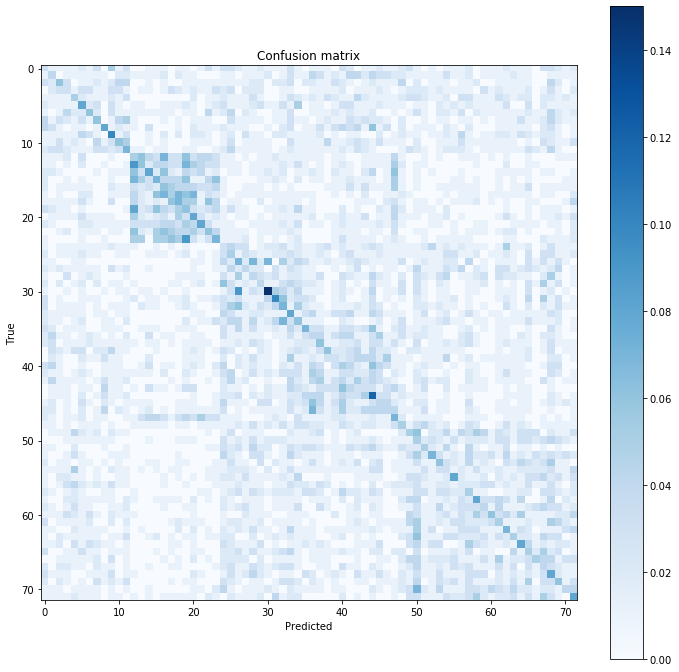

In [13]:
keep_accuracy = np.zeros((10))
j = 0

for participant in files:
    mat = loadmat(participant)
    X_2D = np.array(mat["X_2D"])

    X = X_2D
    y = np.array(mat["exemplarLabels"]).ravel()      # get labels, exemplar, 72 classes

    X_training = X[:int(0.8*len(X))]                 # create the train and test sets
    X_validation = X[int(0.8*len(X)):]

    y_training = y[:int(0.8*len(X))]
    y_validation = y[int(0.8*len(X)):]

    num_classes = 72
    y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes)      # subtract 1 to convert to 0-index
    y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

    # reshape to treat the data like images (124x32)
    X_training = np.reshape(X_training, (-1, electrodes, N, 1))
    X_validation = np.reshape(X_validation, (-1, electrodes, N, 1))

    # deep cnn
    model = Sequential()

    model.add(Conv2D(8, kernel_size=3,input_shape=(124,32, 1), activation = 'relu'))
    model.add(Conv2D(8, kernel_size=3, activation = 'relu'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(16, kernel_size=2,activation = 'relu'))
    model.add(Conv2D(16, kernel_size=2,activation = 'relu'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(72, activation = "softmax"))

    optimizer=Nadam(lr=0.004)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    model.fit(X_training, y_training1hot,                                     # train model
              epochs=50, 
              validation_data=(X_validation, y_validation1hot), 
              shuffle=True)


    y_validation_predictions = model.predict(X_validation, verbose=1)         # make predictions

    # create the confusion matrix
    cnf_matrix7 = confusion_matrix(y_validation-1, np.argmax(y_validation_predictions, axis=1))
    cm_cv7 += cnf_matrix7                                                     # add together all the confusion matrices
    
    _, accuracy = model.evaluate(X_validation, y_validation1hot)              # find accuracy
    keep_accuracy[j] = accuracy
    j = j + 1
    print(" ")
    
print('Accuracy: %.2f' % (np.mean(keep_accuracy)*100))                        # print mean accuracy

sum_by_row = np.sum(cm_cv7, 1)                                                # normalize the final confusion matrix
for i in range(0,72):
    cm_cv7[i,:] = cm_cv7[i,:] / sum_by_row[i]
        
plot_cm(np.round(cm_cv7, 2),72)                                               # plot the final confusion matrix

In [21]:
import sys
np.set_printoptions(threshold=sys.maxsize)

print(cm_cv7)

[[0.02545455 0.00727273 0.01454545 0.01454545 0.01090909 0.02181818
  0.01090909 0.02545455 0.00363636 0.04727273 0.01454545 0.02909091
  0.00363636 0.00363636 0.00727273 0.01454545 0.01090909 0.
  0.01090909 0.00727273 0.         0.01454545 0.02545455 0.01090909
  0.02545455 0.02545455 0.02181818 0.01090909 0.01090909 0.02181818
  0.00727273 0.01454545 0.00727273 0.02545455 0.01454545 0.00363636
  0.01090909 0.01454545 0.00727273 0.00363636 0.02545455 0.01818182
  0.00363636 0.00727273 0.01090909 0.01818182 0.01090909 0.01090909
  0.01818182 0.02909091 0.01454545 0.00363636 0.01090909 0.00363636
  0.00727273 0.01454545 0.01454545 0.02181818 0.00363636 0.00727273
  0.00727273 0.01454545 0.01818182 0.01454545 0.01090909 0.00727273
  0.00363636 0.03272727 0.03272727 0.01818182 0.00727273 0.01818182]
 [0.0070922  0.04255319 0.0035461  0.0070922  0.0141844  0.0070922
  0.0070922  0.0106383  0.0106383  0.0035461  0.0248227  0.0177305
  0.0106383  0.0070922  0.0141844  0.0070922  0.0177305  